### 1. Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
# Data display coustomization
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### 2. Importing File

In [3]:
df = pd.read_csv('Leads.csv')

In [4]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Importing Data Dictionary

In [5]:
dictn = pd.read_excel('Leads Data Dictionary.xlsx',header = 2,  usecols=('Variables','Description'))

In [6]:
dictn

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


### 3. Understanding the Dataframe & Data Cleaning

In [7]:
df.shape

(9240, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 3.1 Inspecting the dataframe

In [10]:
my_data = []
my_data1 = []
my_data2 = []
for col in df:
    my_data.append([col,df[col].nunique()])
for col in df:
    my_data1.append([col,df[col].dtypes])
for col in df:
    my_data2.append([col,(df[col].isnull().sum()*100.00)/df.shape[0]])


In [11]:
my_data = pd.DataFrame(data=my_data, columns=['Column Name','Unique Values'])
my_data1 = pd.DataFrame(data=my_data1, columns=['Column Name','Data Type'])
my_data2 = pd.DataFrame(data=my_data2, columns=['Column Name','Null Values%'])
data = pd.merge(pd.merge(my_data,my_data1,on='Column Name'),my_data2,on='Column Name')

In [12]:
data

,Column Name,Unique Values,Data Type,Null Values%
0,Prospect ID,9240,object,0.000000
1,Lead Number,9240,int64,0.000000
2,Lead Origin,5,object,0.000000
3,Lead Source,21,object,0.389610
4,Do Not Email,2,object,0.000000
5,Do Not Call,2,object,0.000000
6,Converted,2,int64,0.000000
7,TotalVisits,41,float64,1.482684
8,Total Time Spent on Website,1731,int64,0.000000
9,Page Views Per Visit,114,float64,1.482684


Removing the columns
1. with high null values
2. with all the values as unique values ( Columns that can act as primary key or secondary key)
3. with only 1 value in the column

In [13]:
cols_high_null = data[data['Null Values%']> 30]['Column Name']
# cols_after_lead = data[(data['Column Name'].str.contains("Lead"))]['Column Name']
cols_with_unique = data[(data['Unique Values'] == df.shape[0])]['Column Name']
cols_with_no_unique = data[(data['Unique Values'] == 1)]['Column Name']

In [14]:
cols_to_remove = data[data['Column Name'].isin(cols_high_null) | data['Column Name'].isin(cols_with_unique)
                     | data['Column Name'].isin(cols_with_no_unique)]['Column Name'] 
cols_to_remove = cols_to_remove.to_list()

In [15]:
cols_to_remove

['Prospect ID',
 'Lead Number',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque']

In [16]:
for col in cols_to_remove:
    df.drop([col],axis = 1 , inplace = True)

In [17]:
df.shape

(9240, 24)

In [18]:
data = data[data['Column Name'].isin(df.columns)].sort_values(by = 'Null Values%', ascending = False )
data

,Column Name,Unique Values,Data Type,Null Values%
28,Lead Profile,6,object,29.318182
15,What matters most to you in choosing a course,3,object,29.318182
14,What is your current occupation,6,object,29.112554
11,Country,38,object,26.634199
13,How did you hear about X Education,10,object,23.885281
12,Specialization,19,object,15.562771
29,City,7,object,15.367965
7,TotalVisits,41,float64,1.482684
9,Page Views Per Visit,114,float64,1.482684
10,Last Activity,17,object,1.114719


#### 3.2 Segregating the data into categorical and numerical data for null values treatment

In [19]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_cat= df.select_dtypes(include = ['object'])

In [20]:
df_cat = df_cat.replace('Select',np.nan)
df_cat = df_cat.fillna('Not Selected')
df_num = df_num.fillna(df.median())

##### 3.2.1 Univariate Analysis - Categorical (To understand data imbalance and grouping of data if possible)

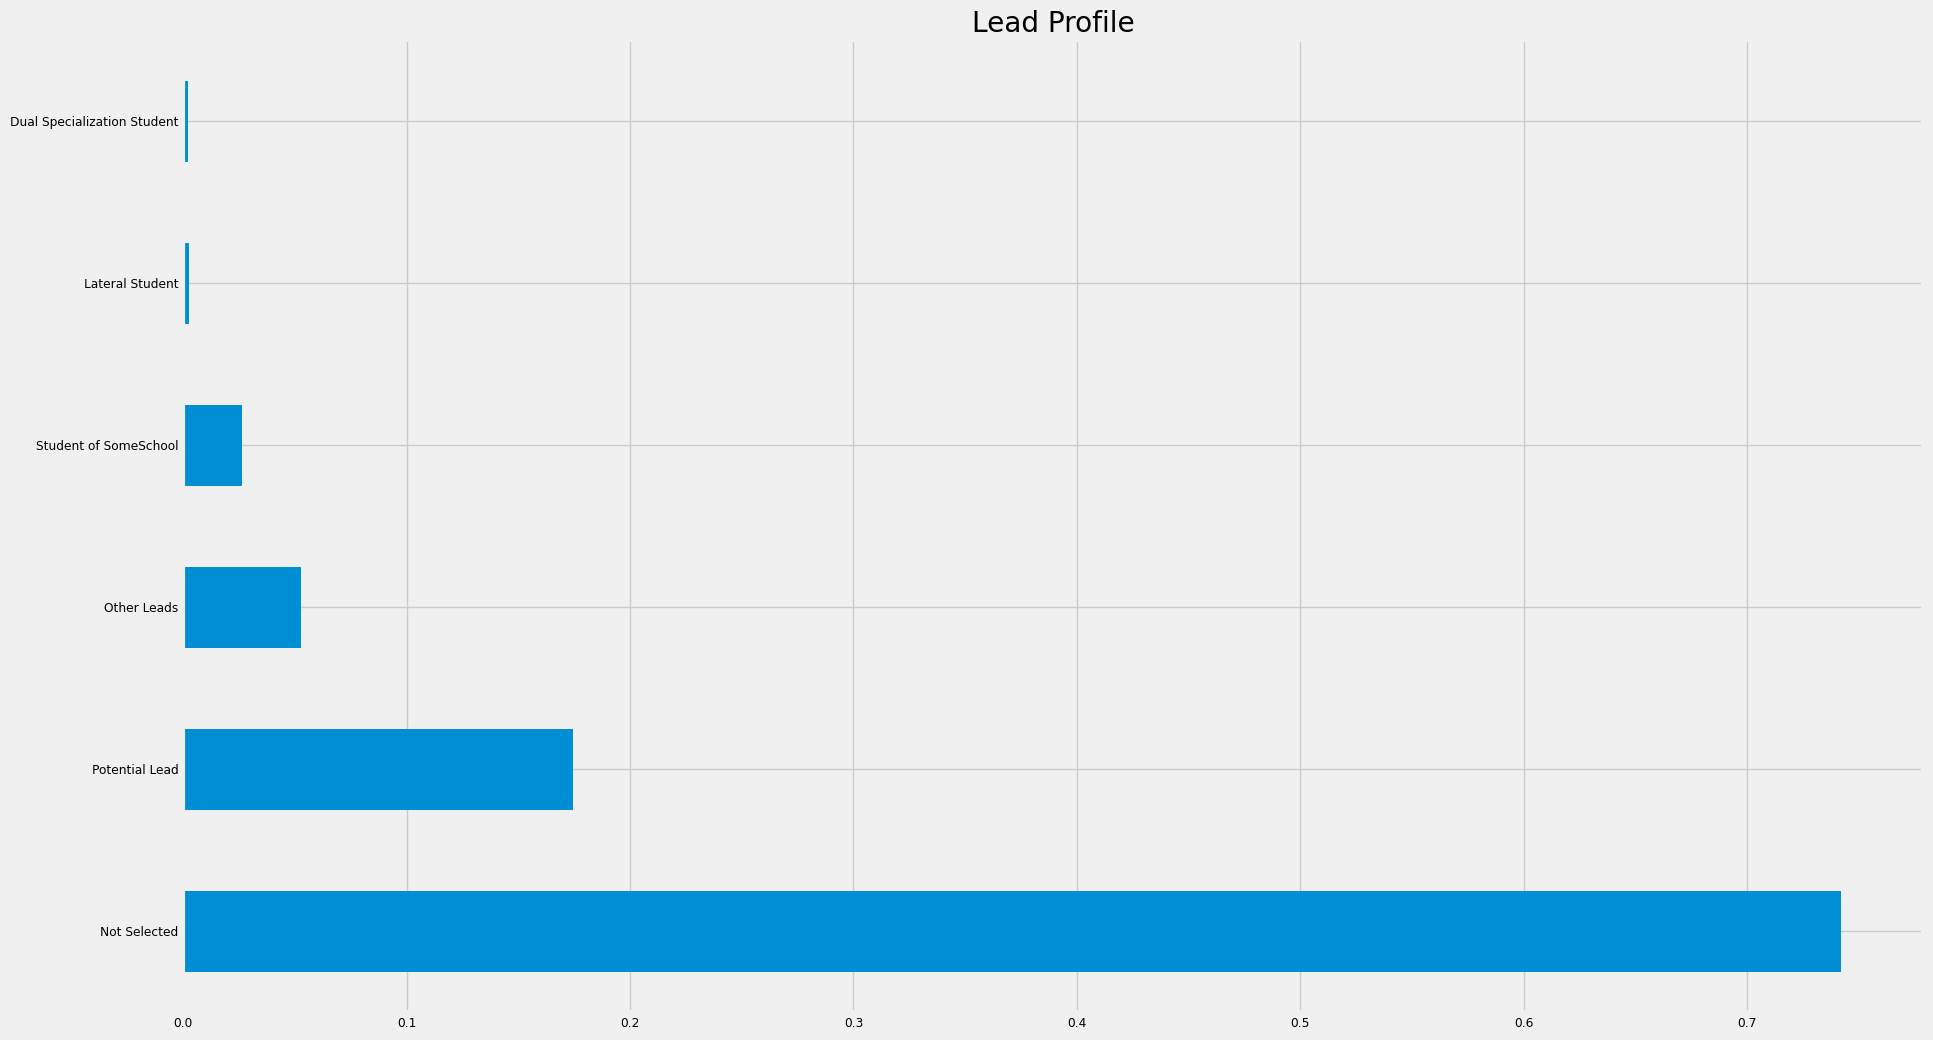

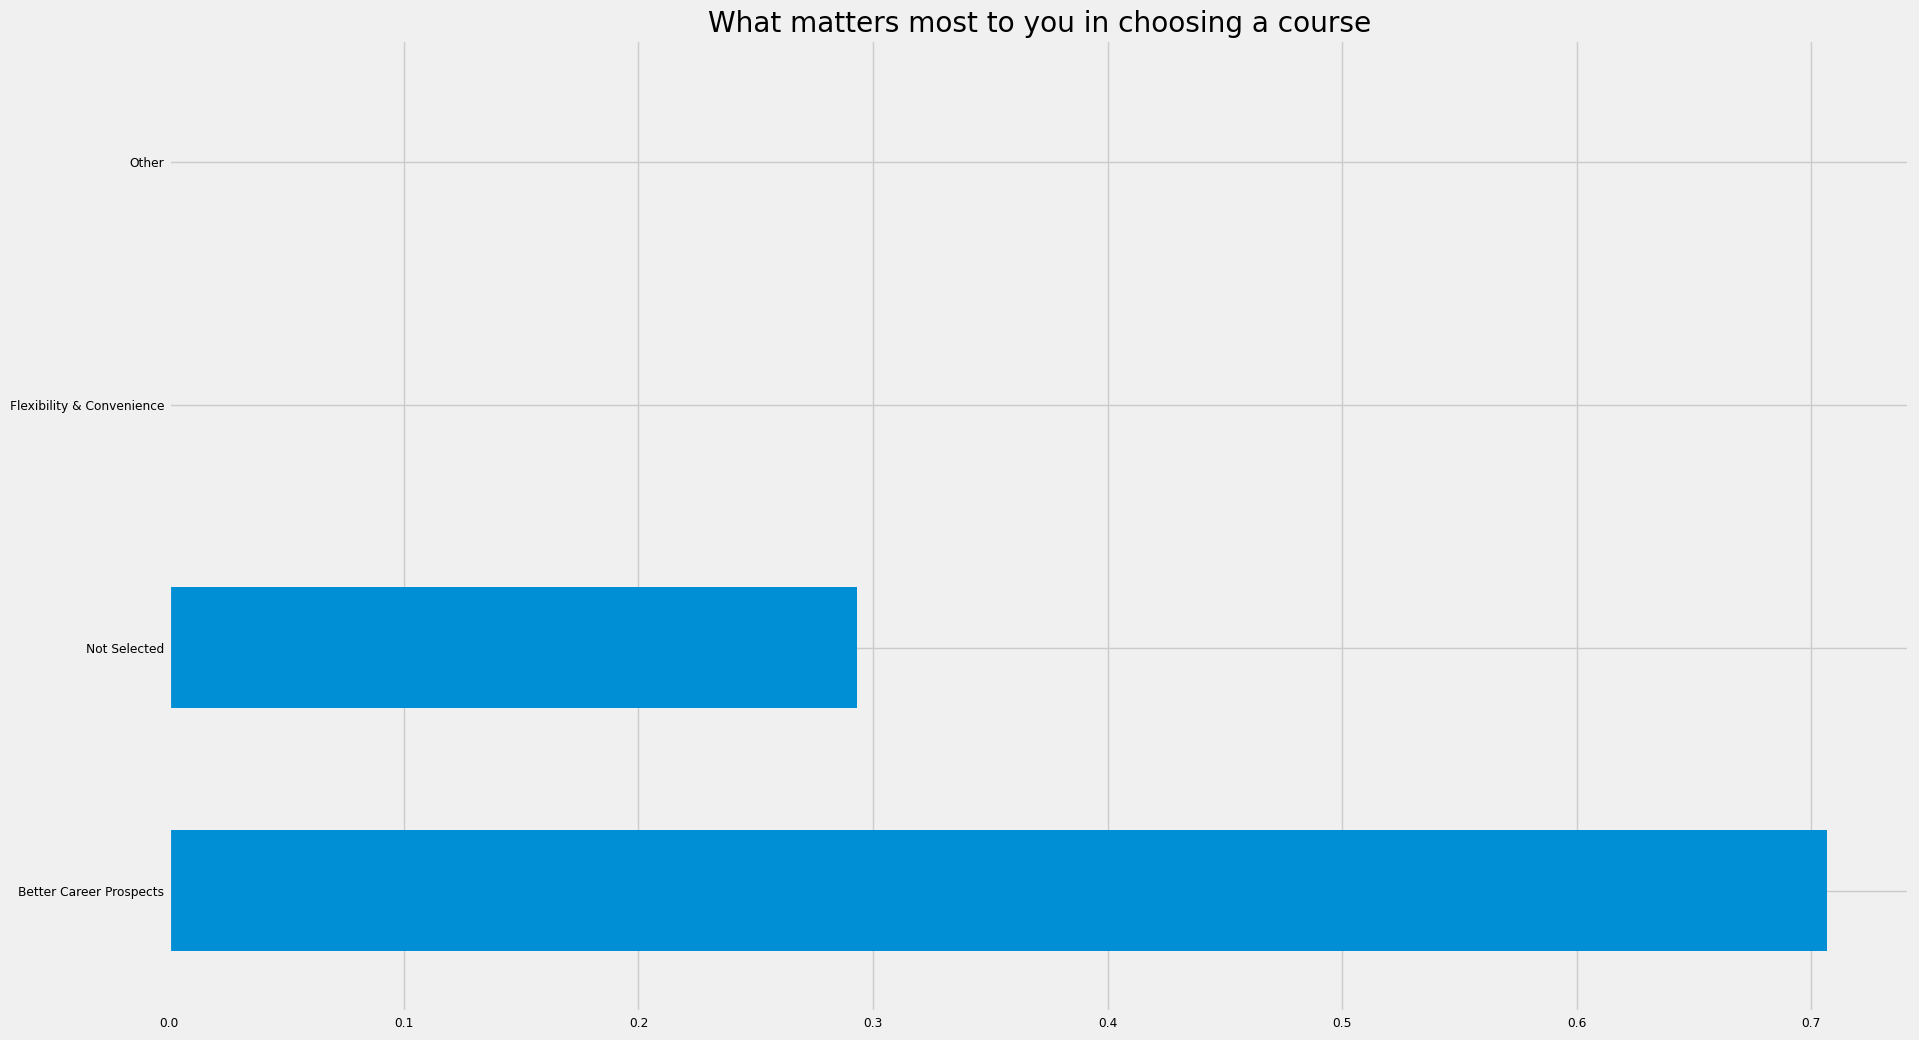

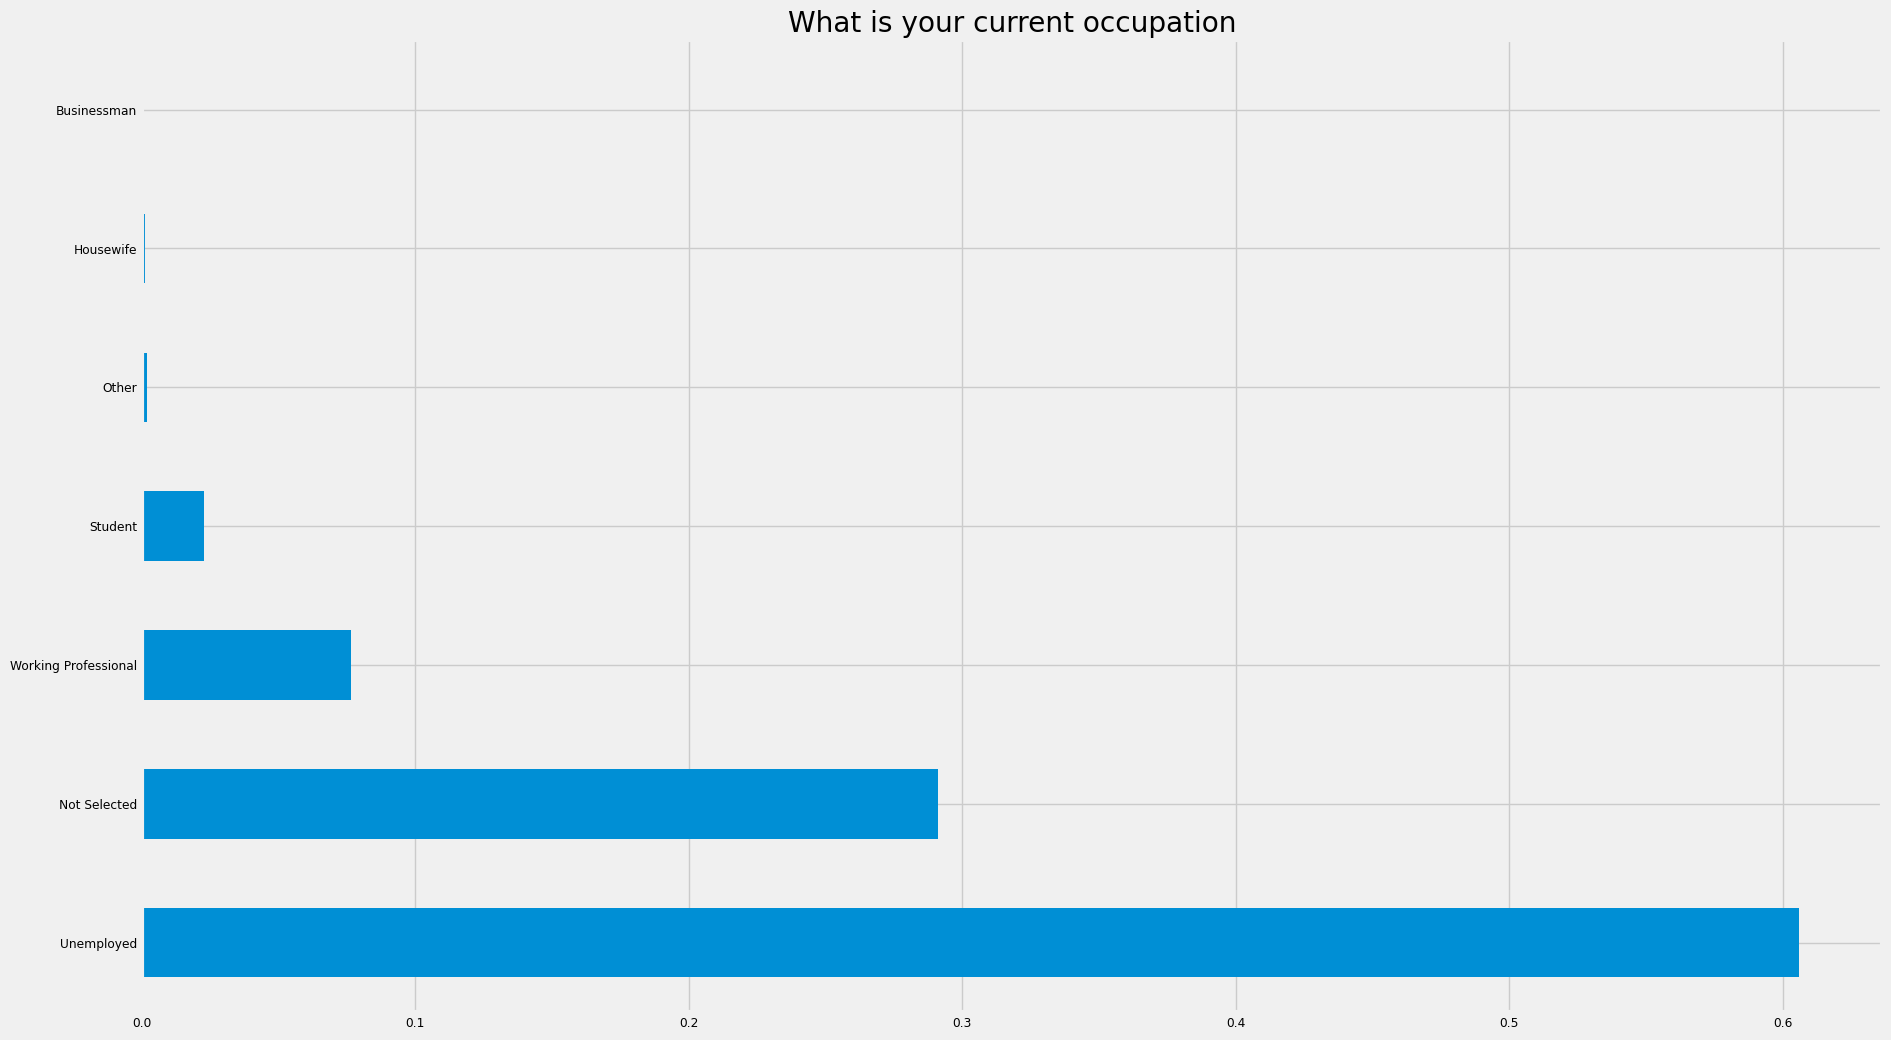

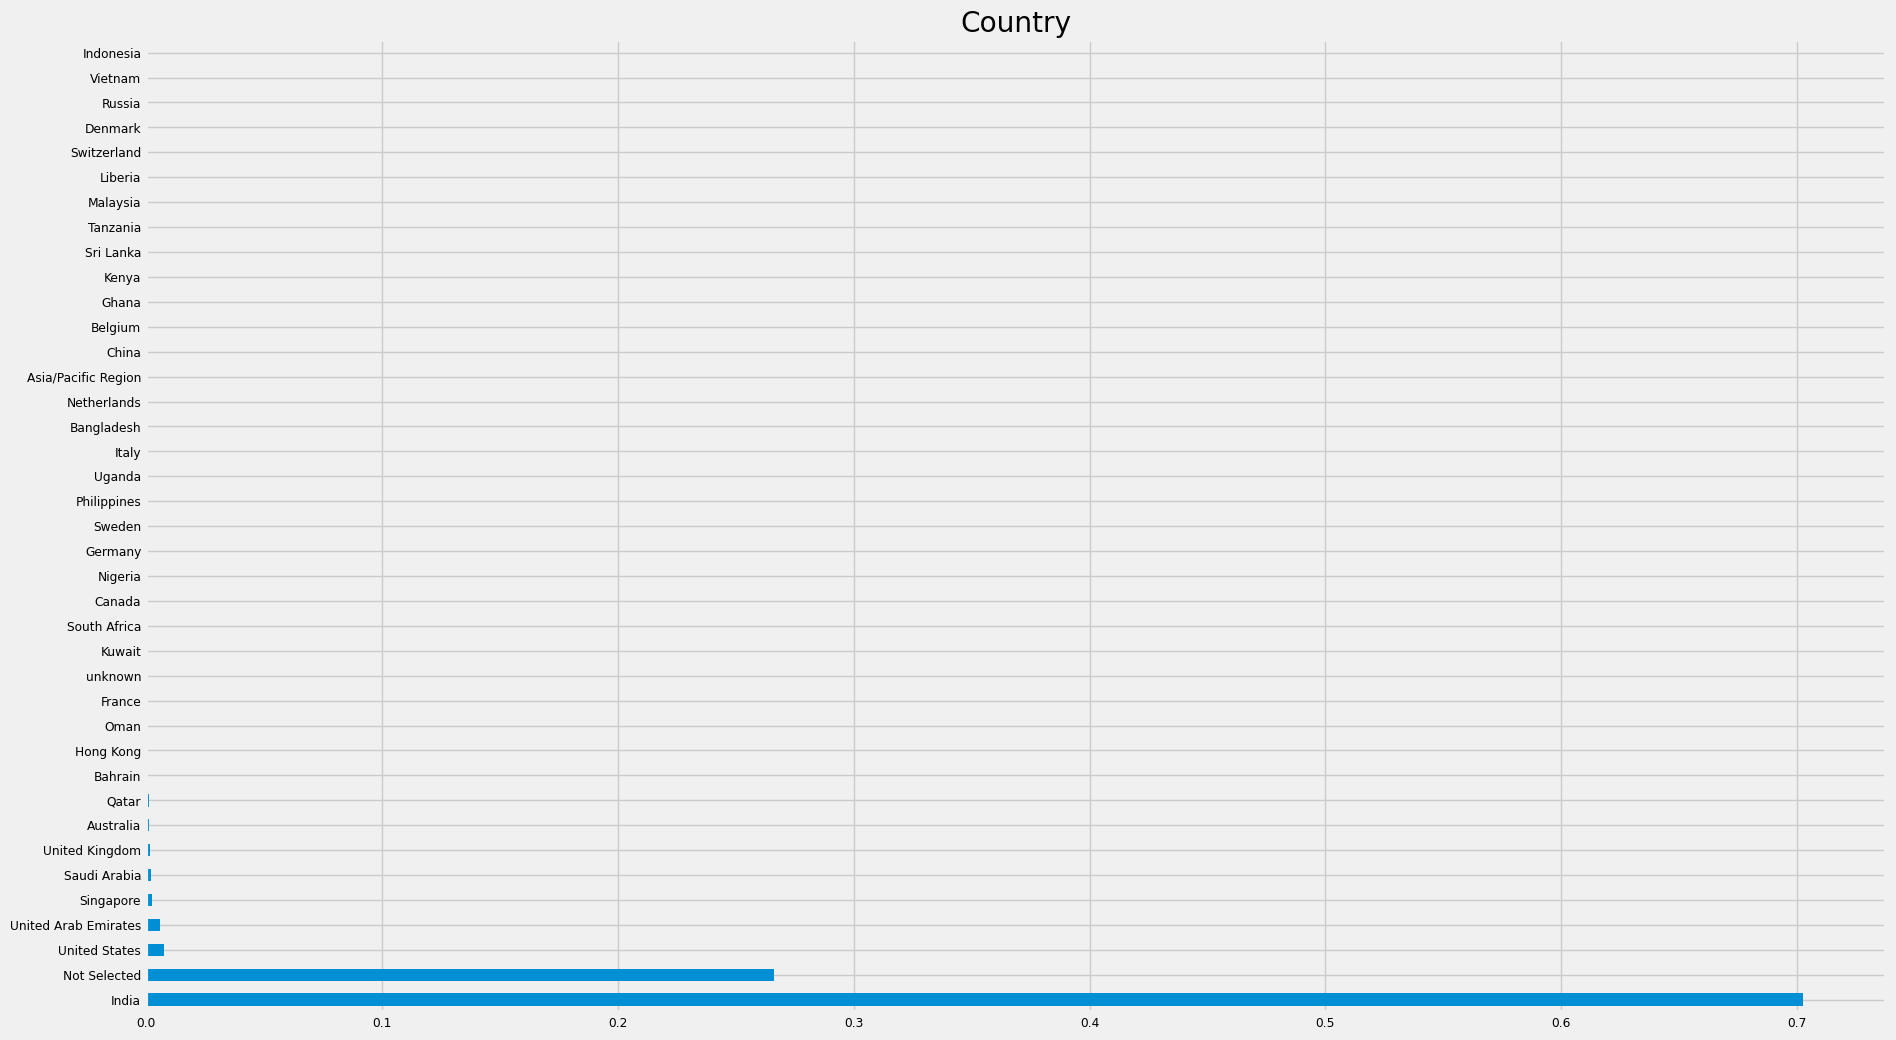

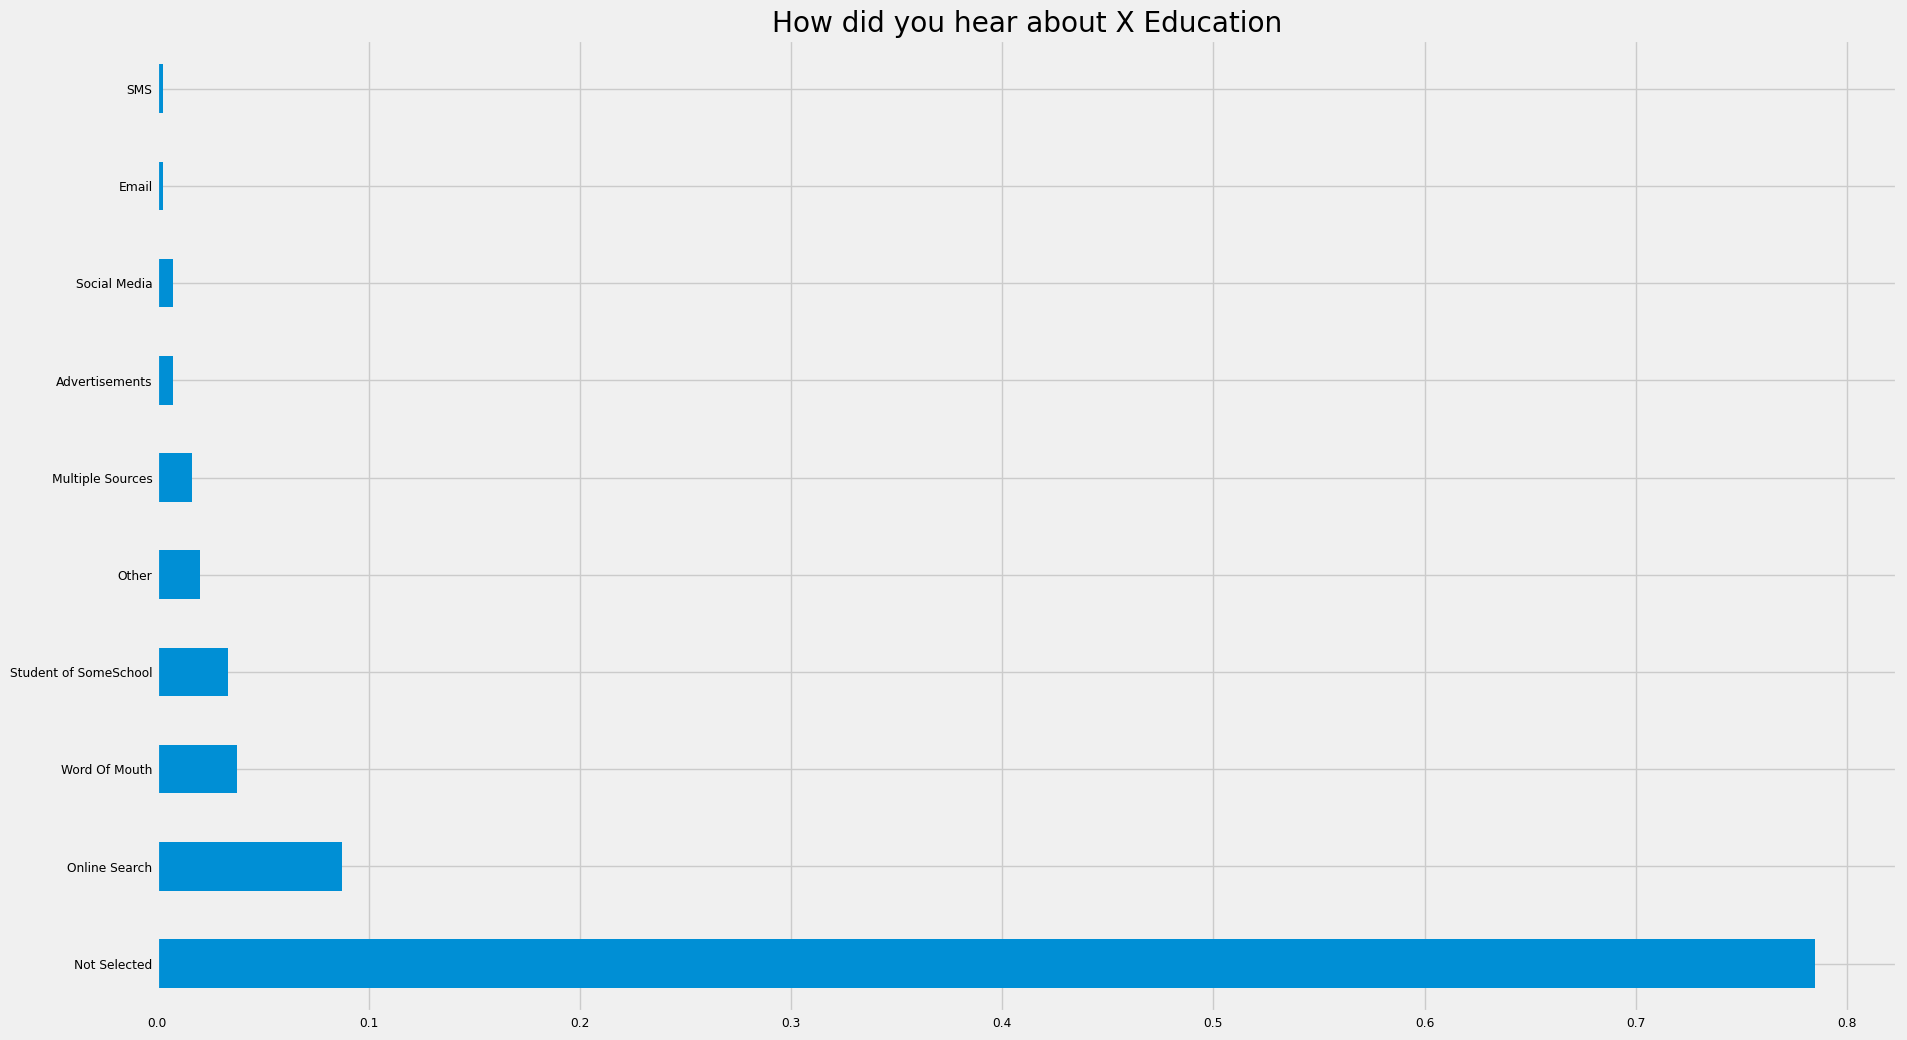

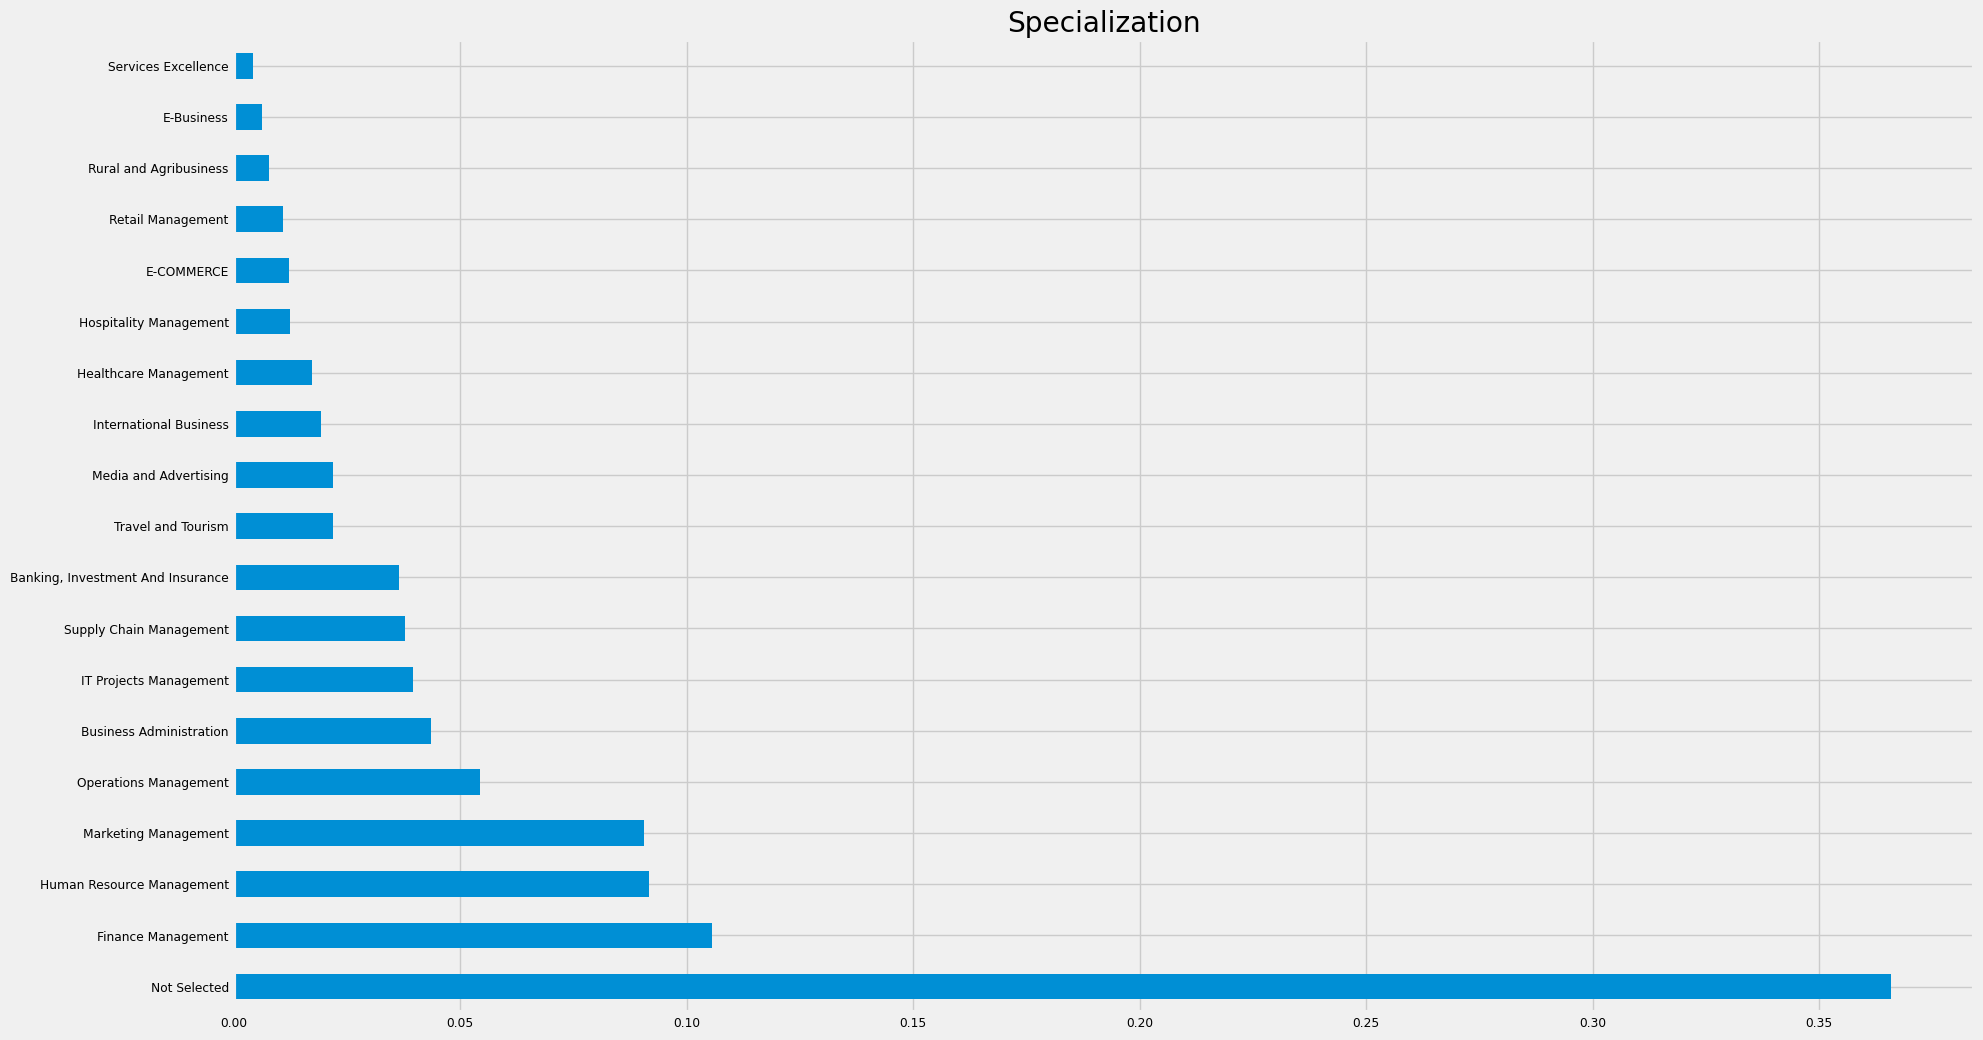

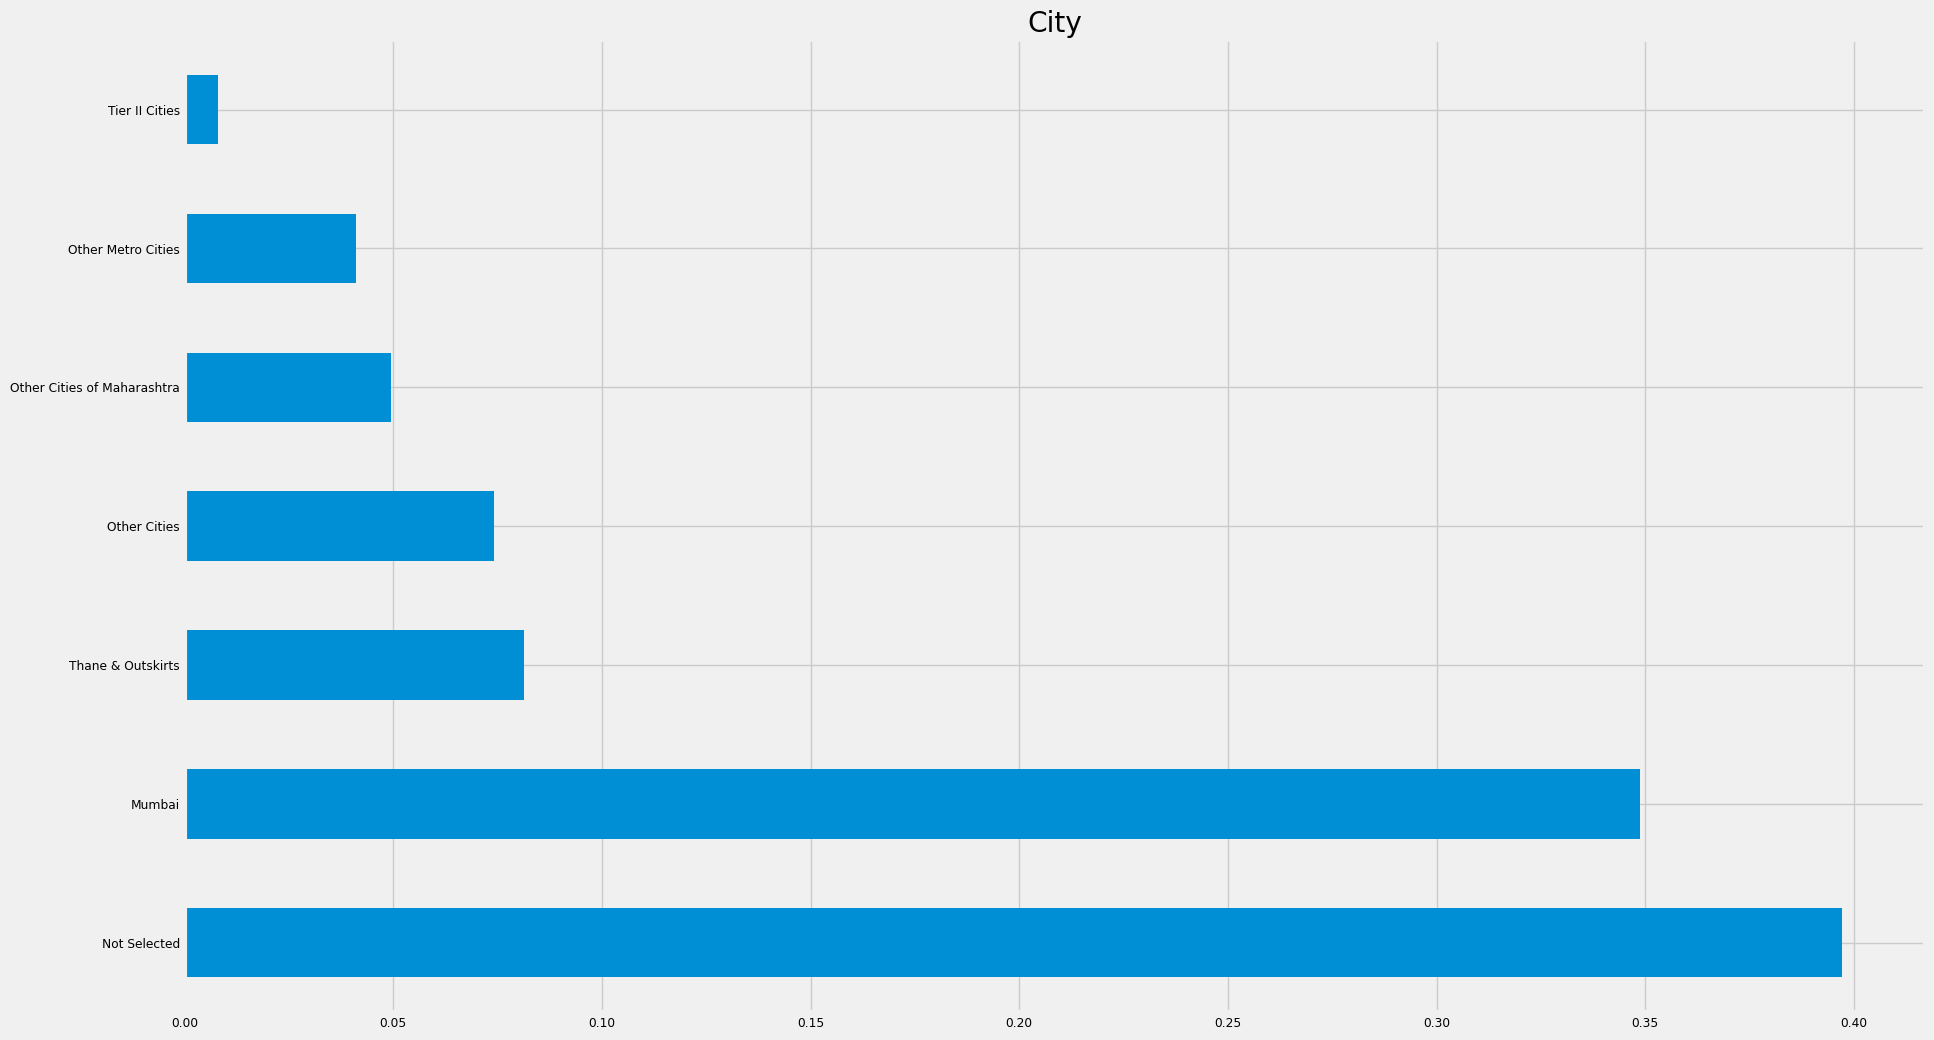

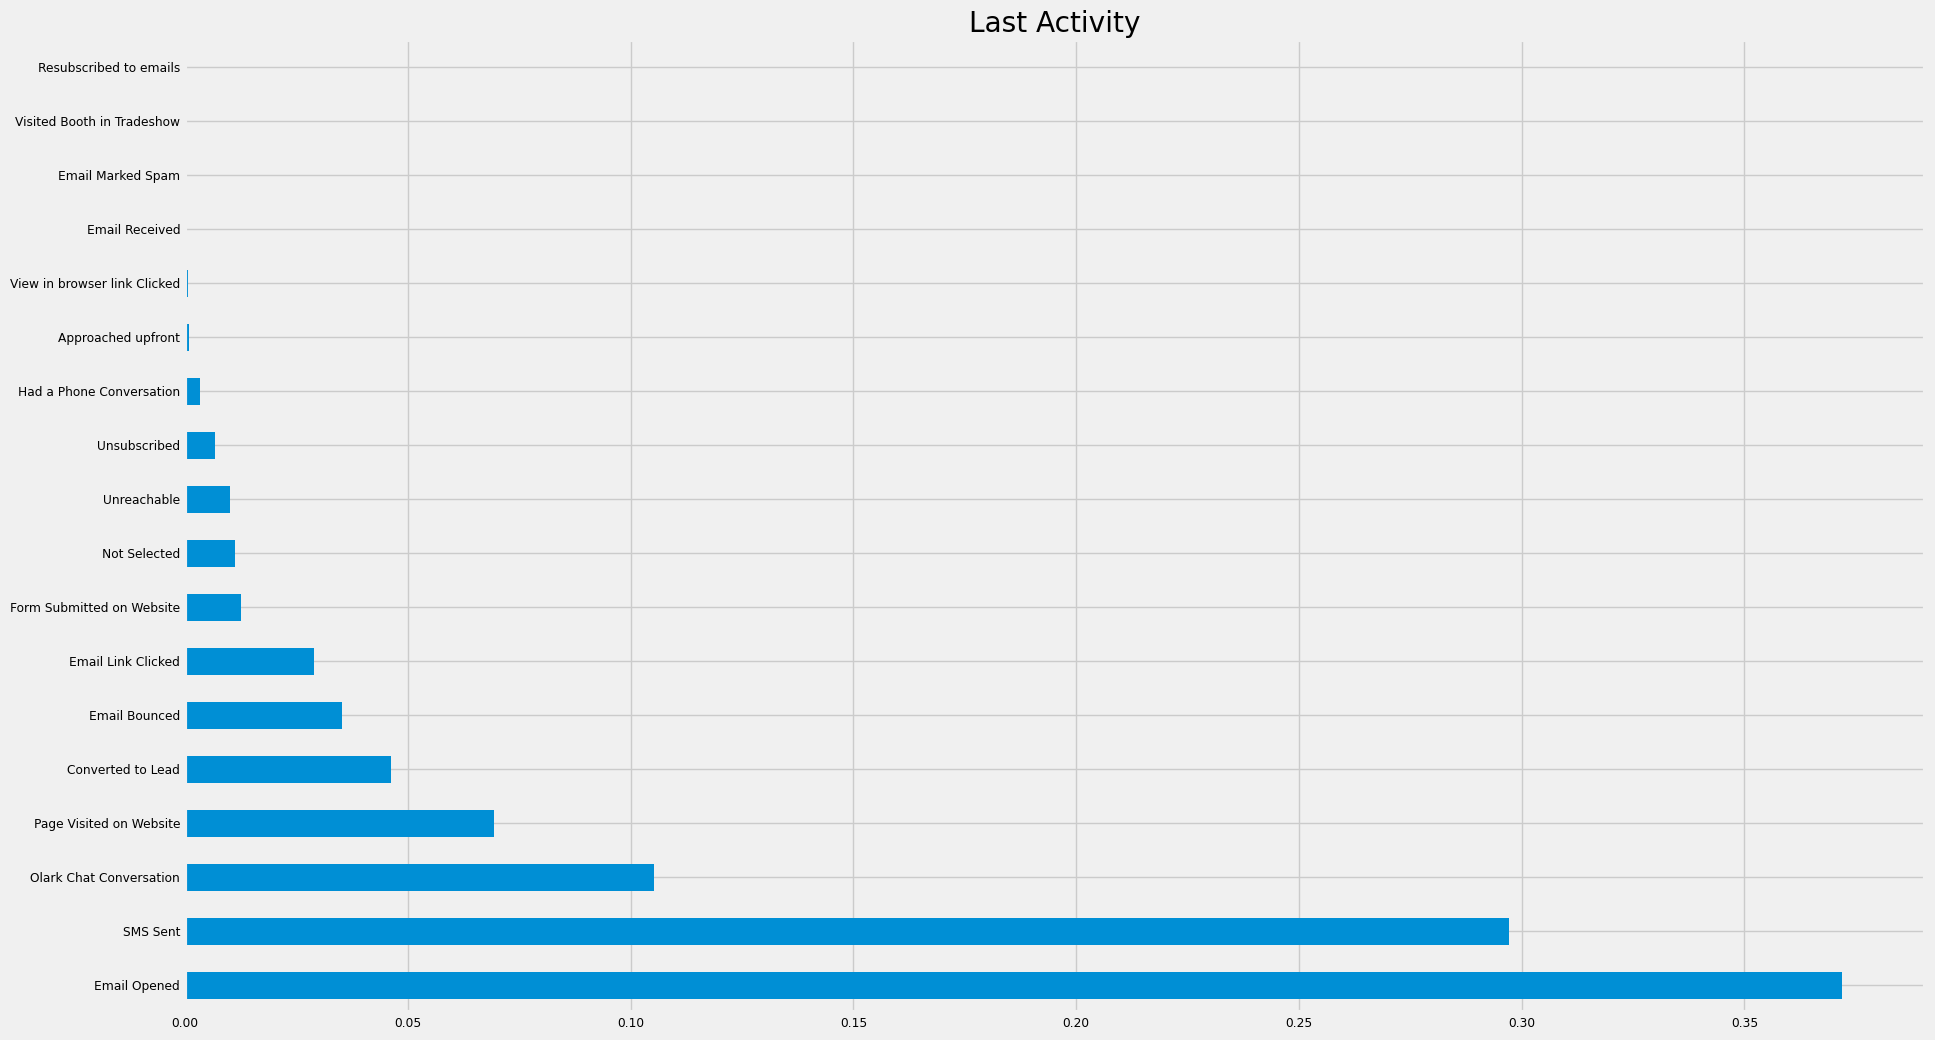

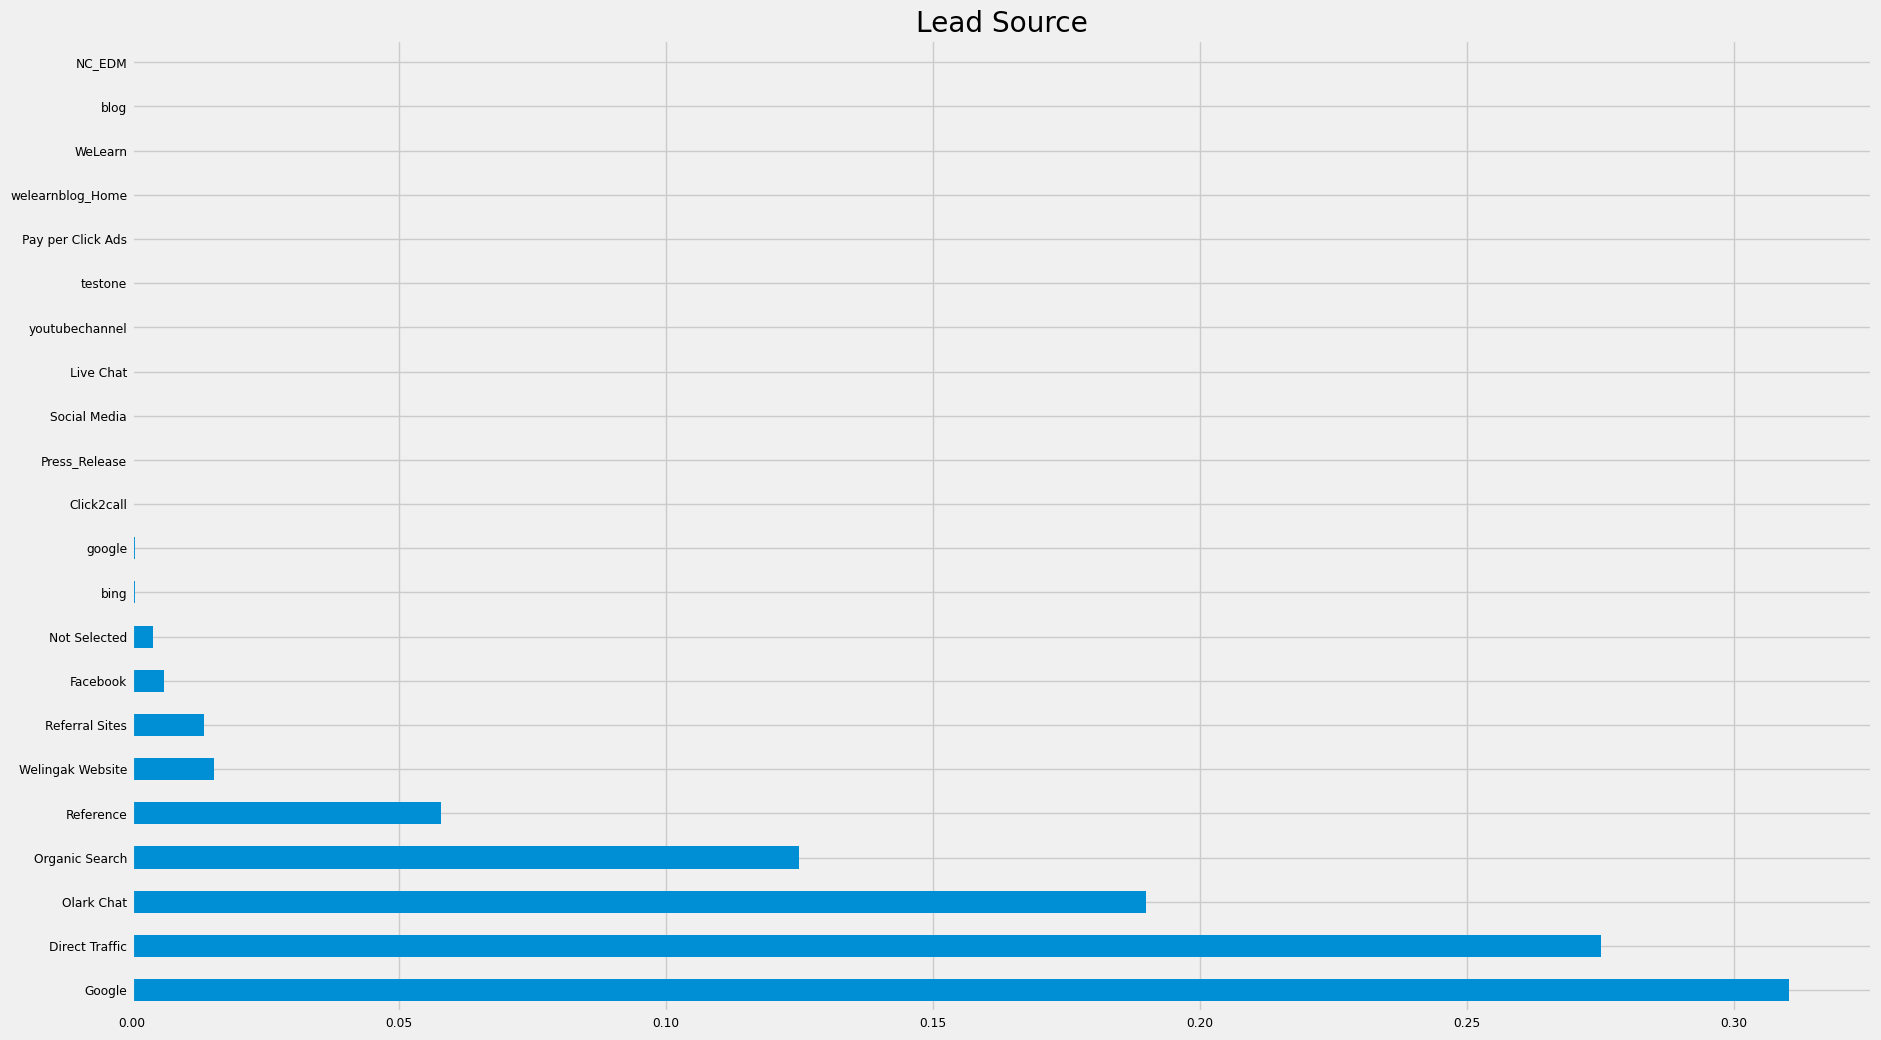

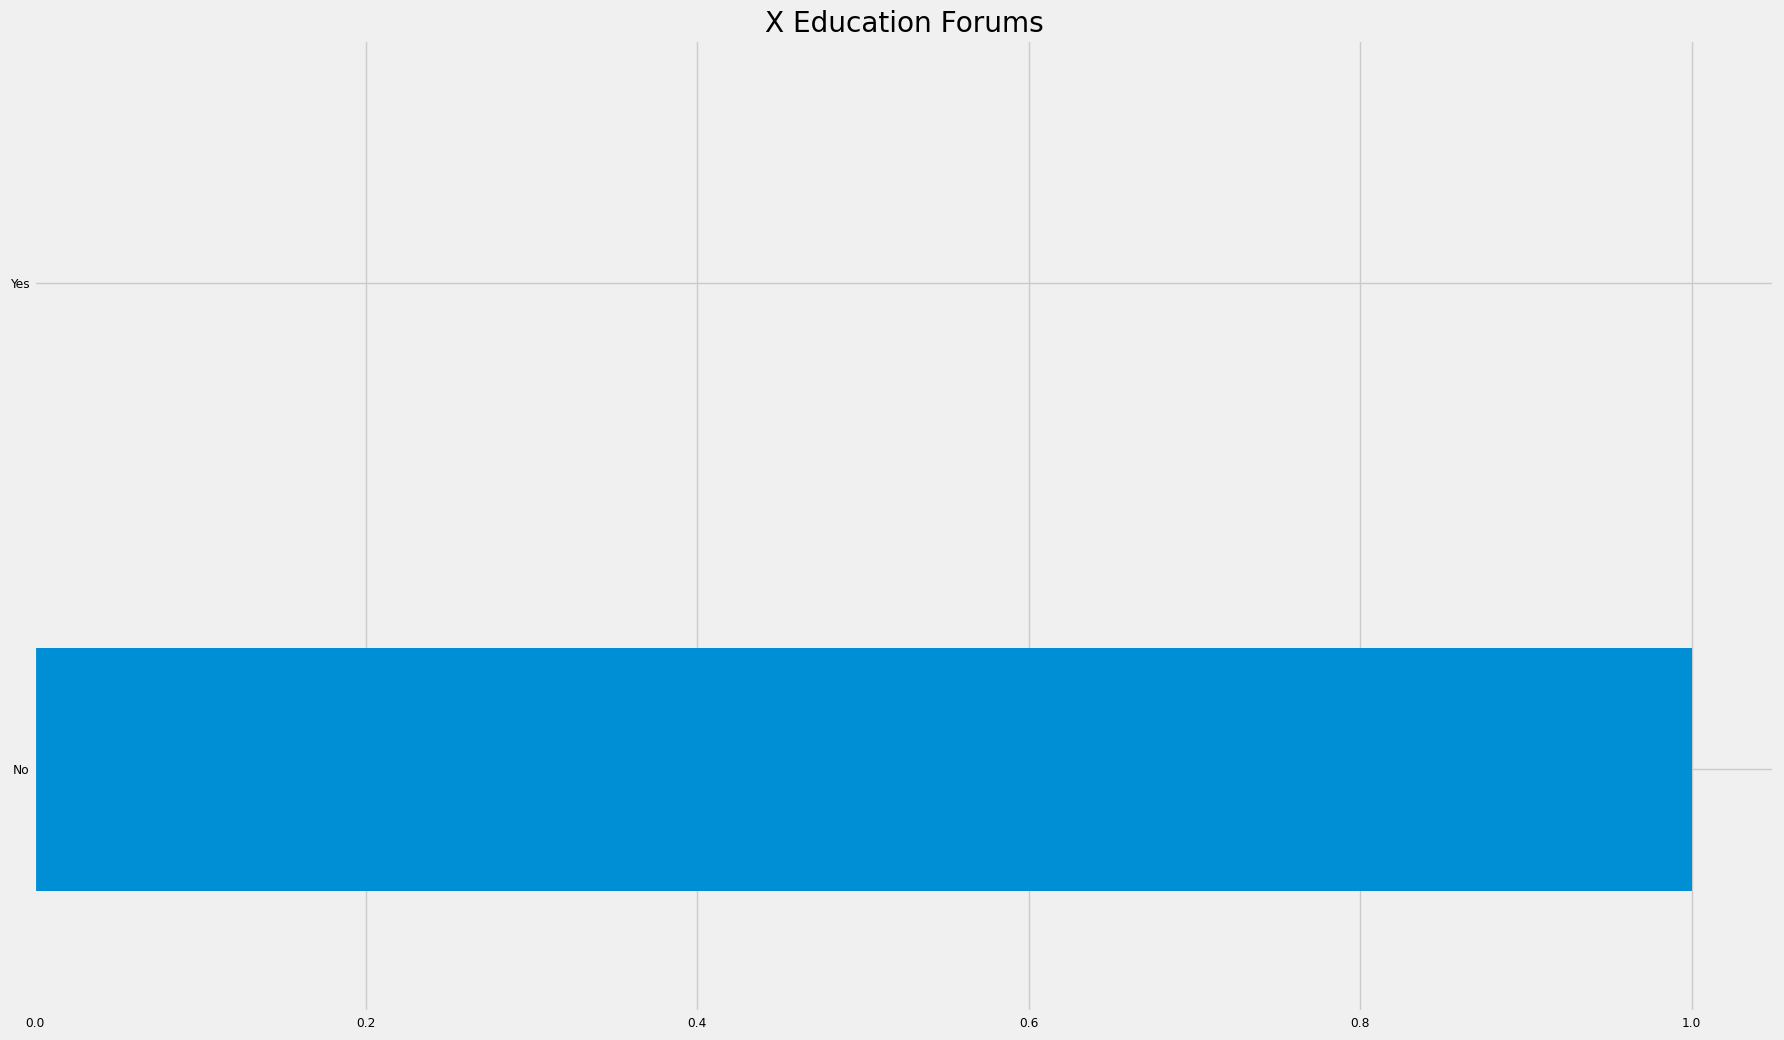

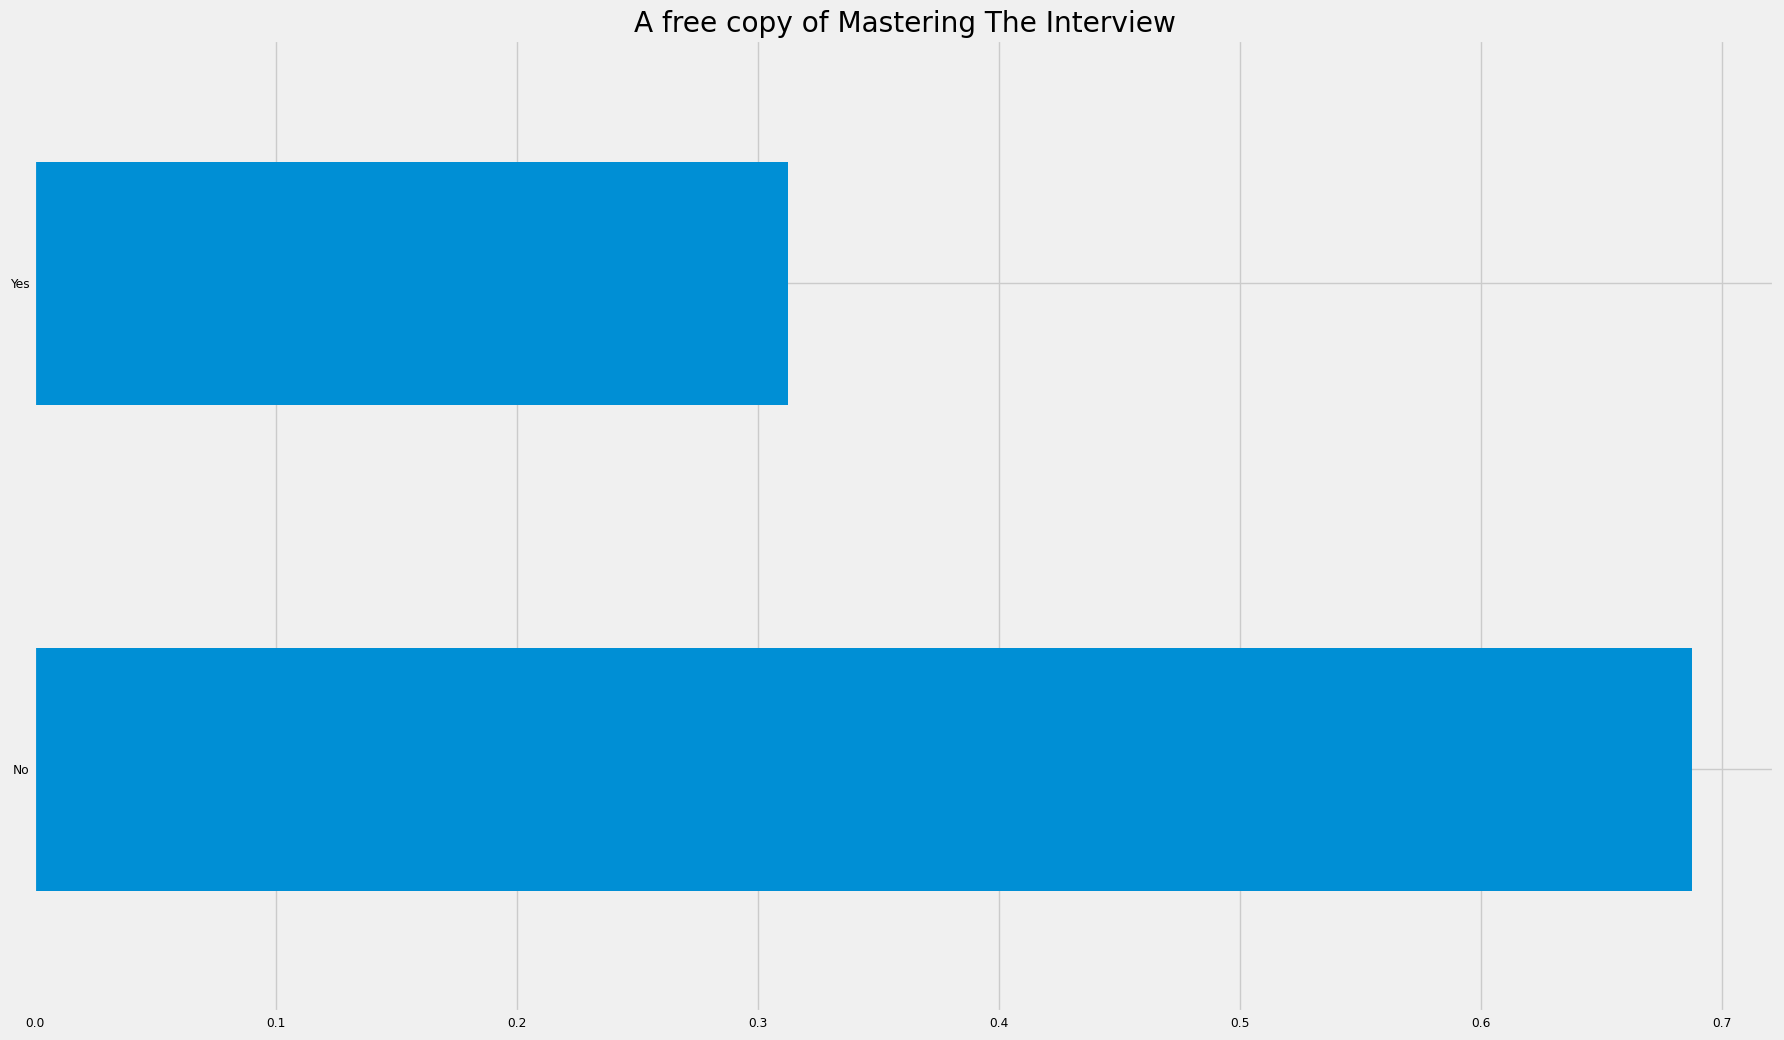

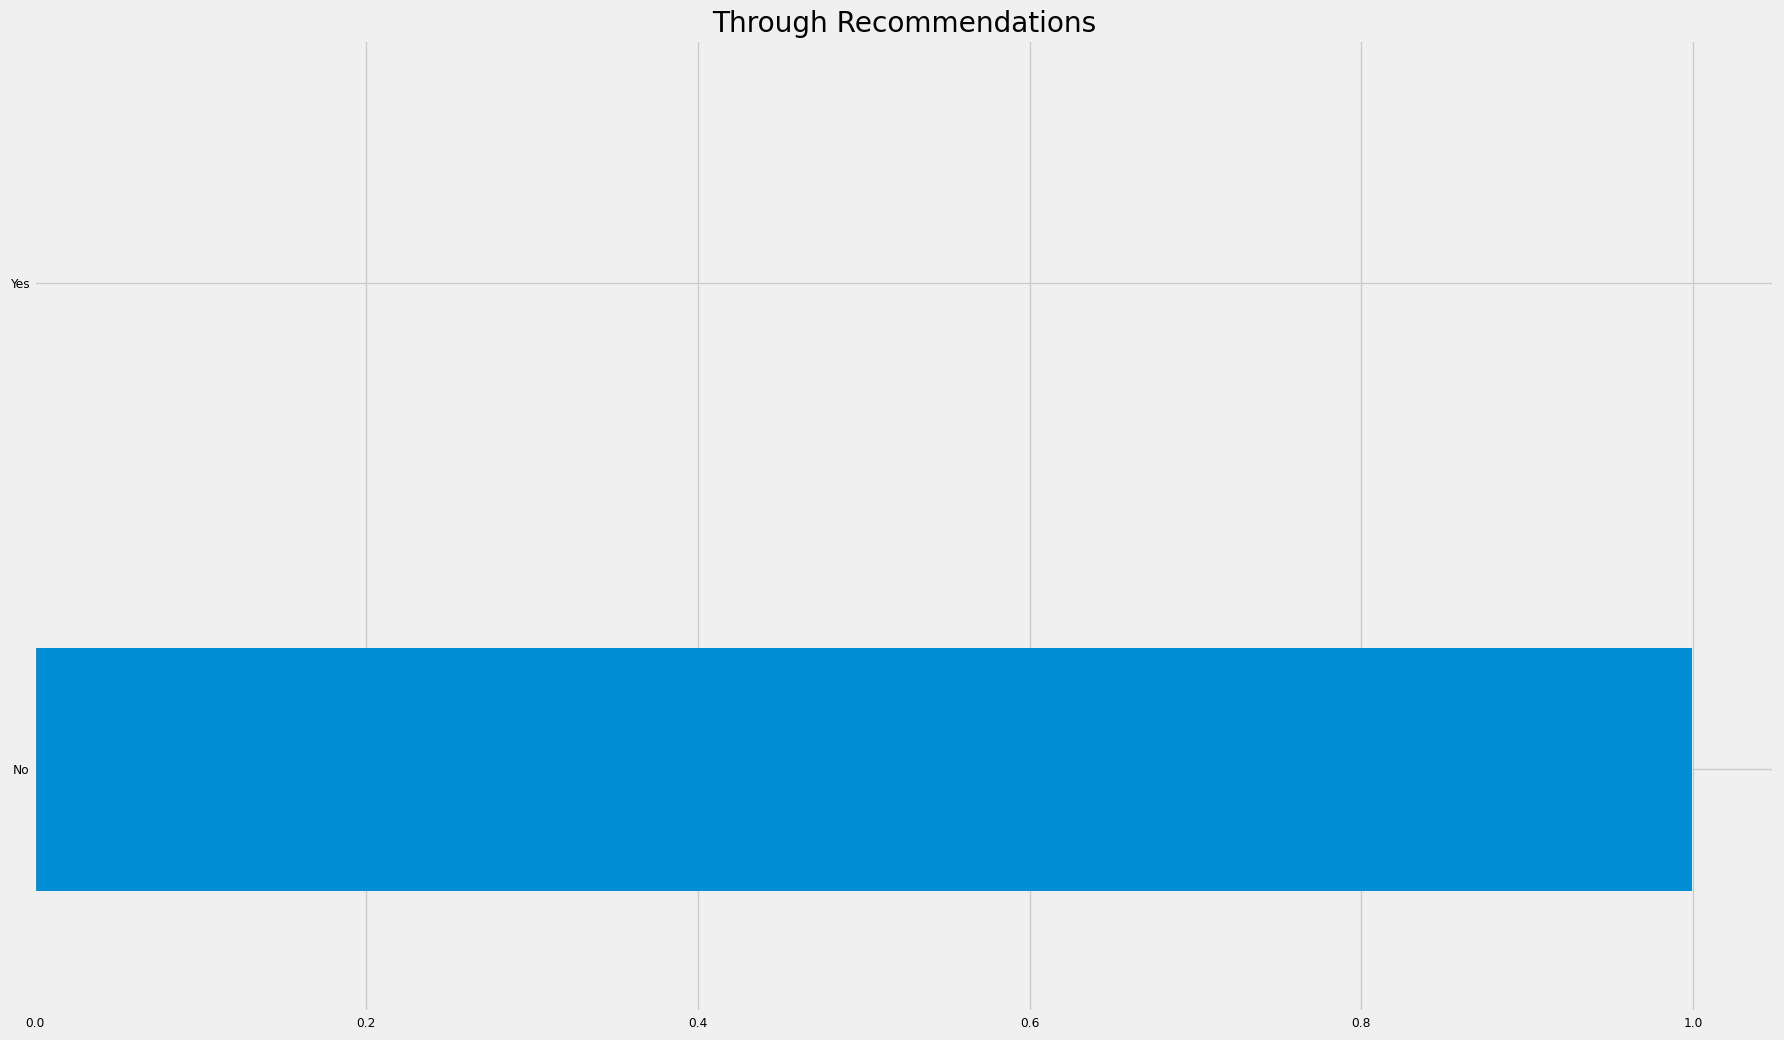

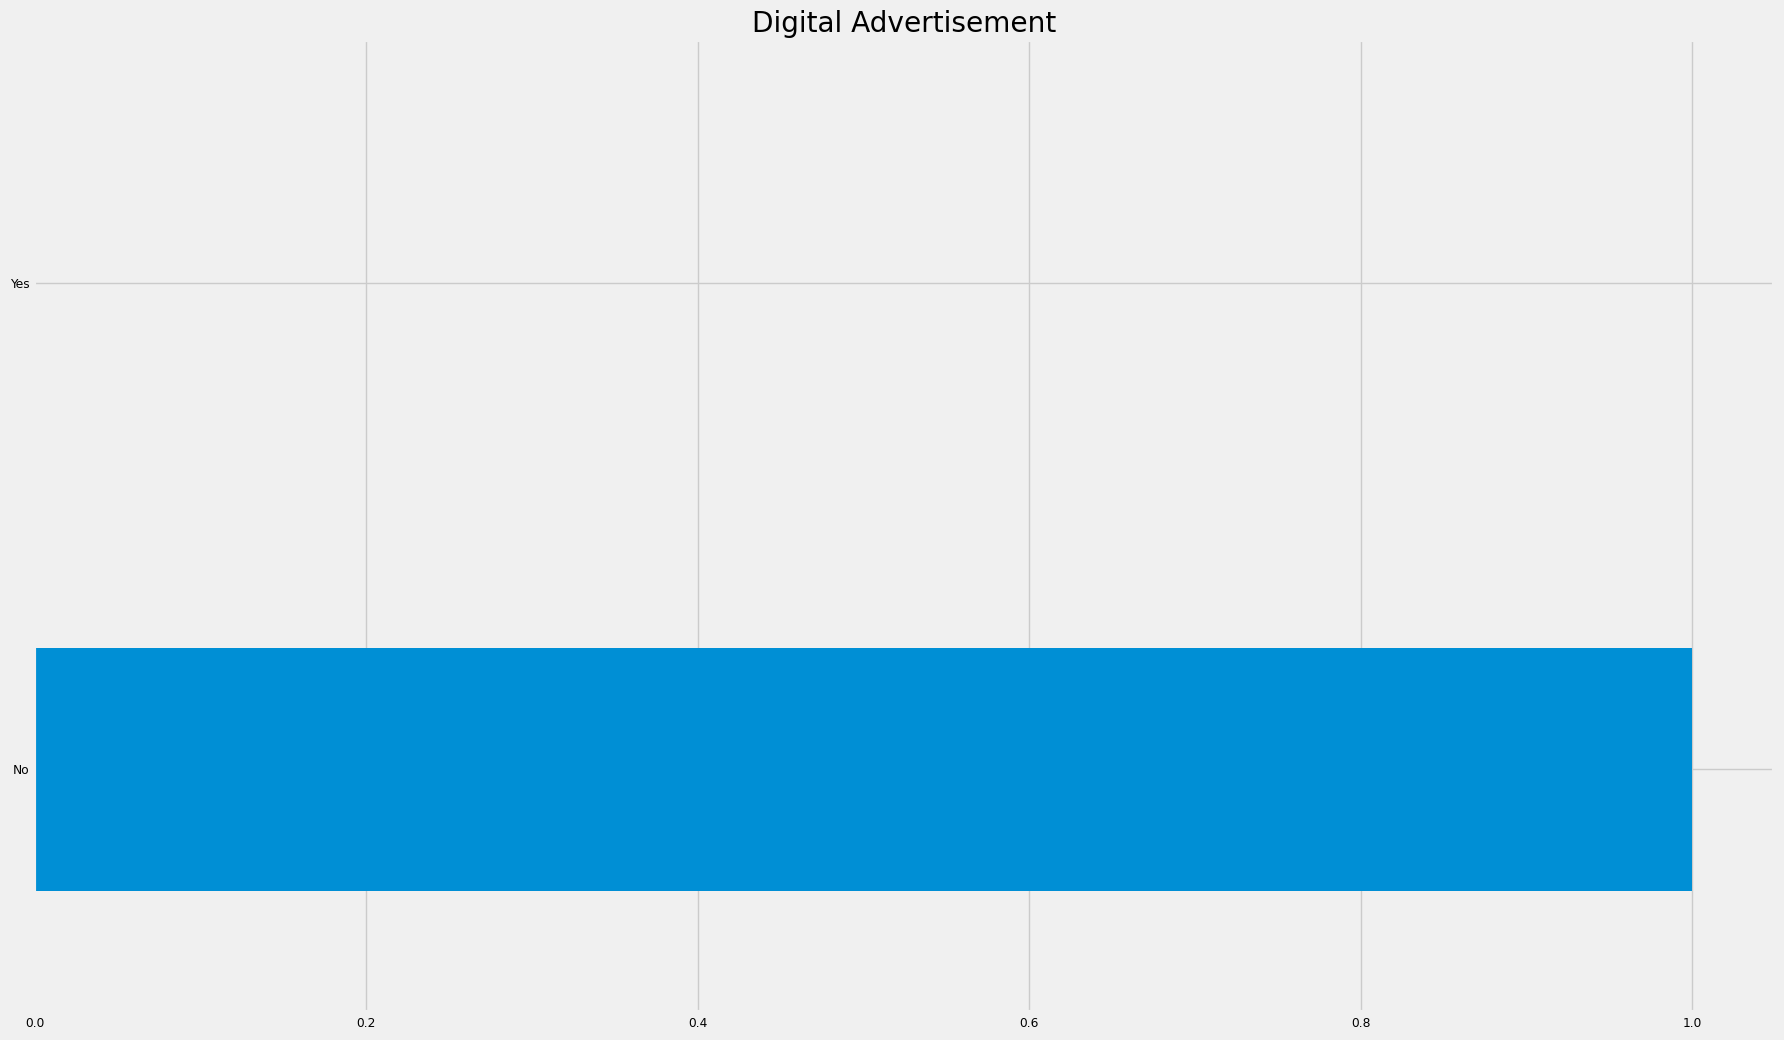

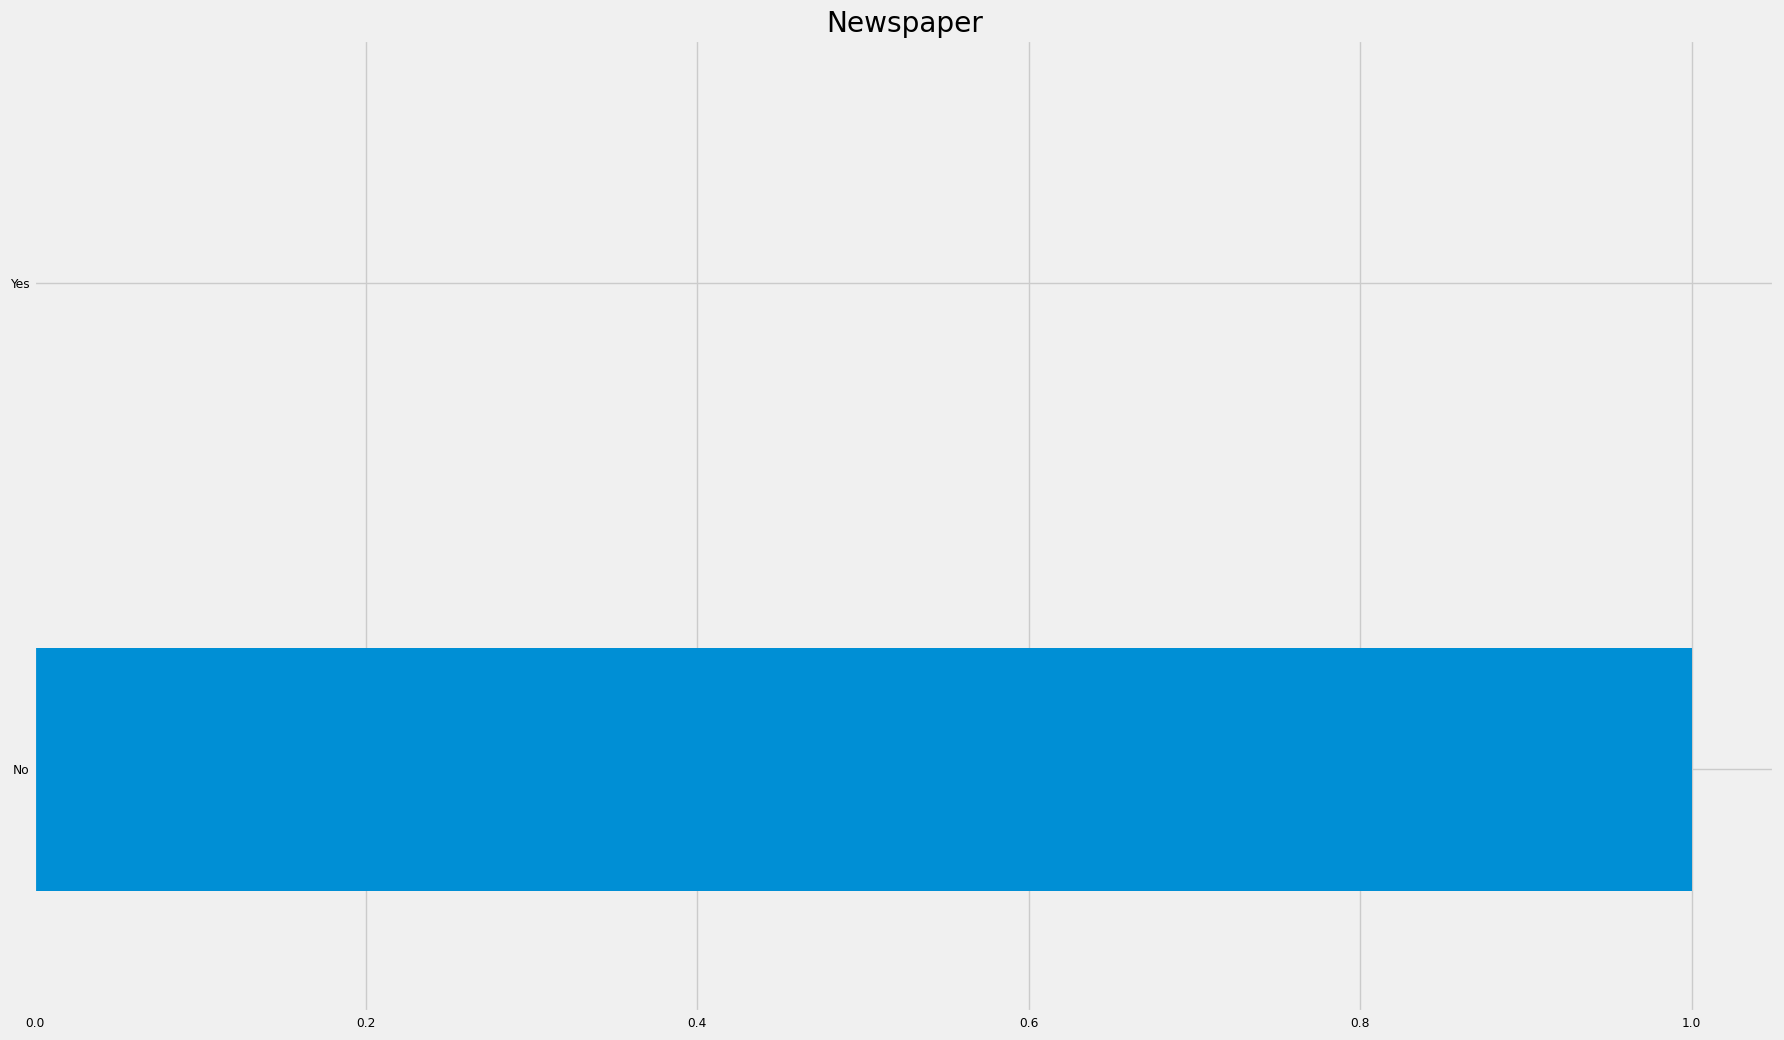

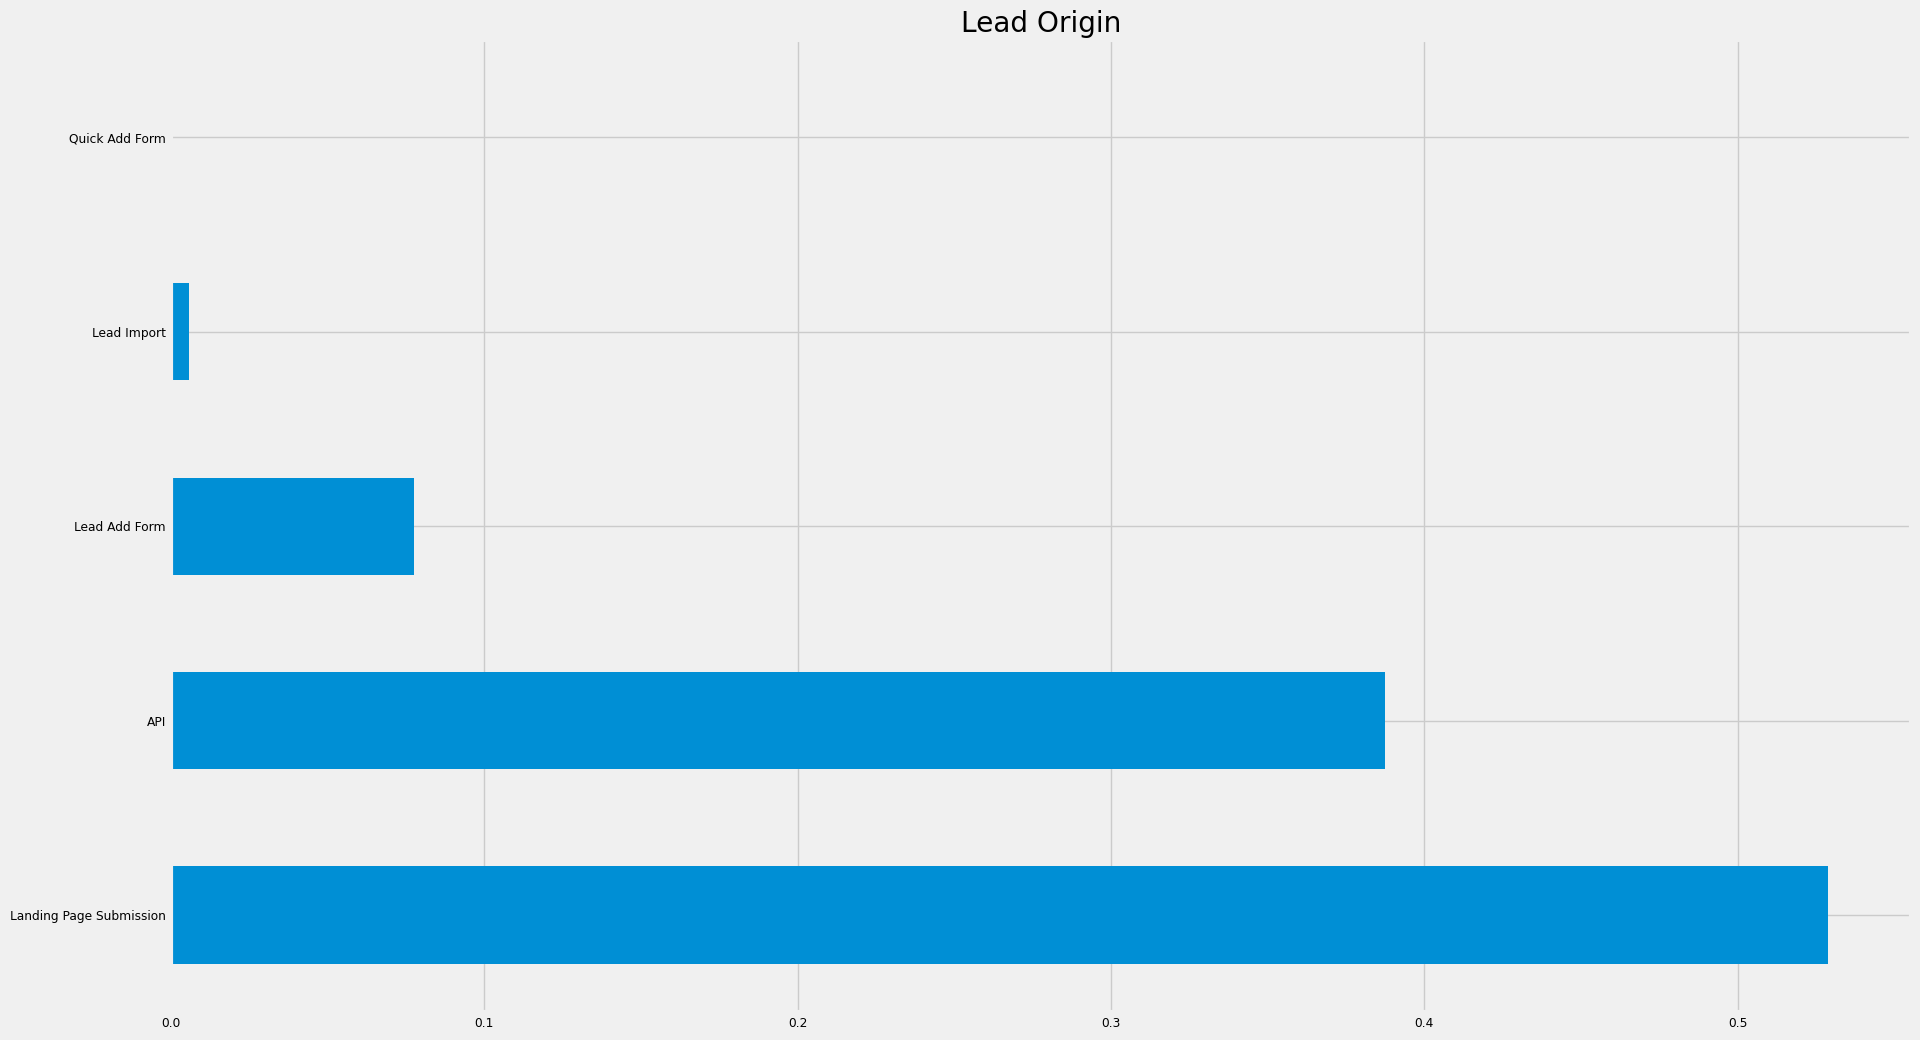

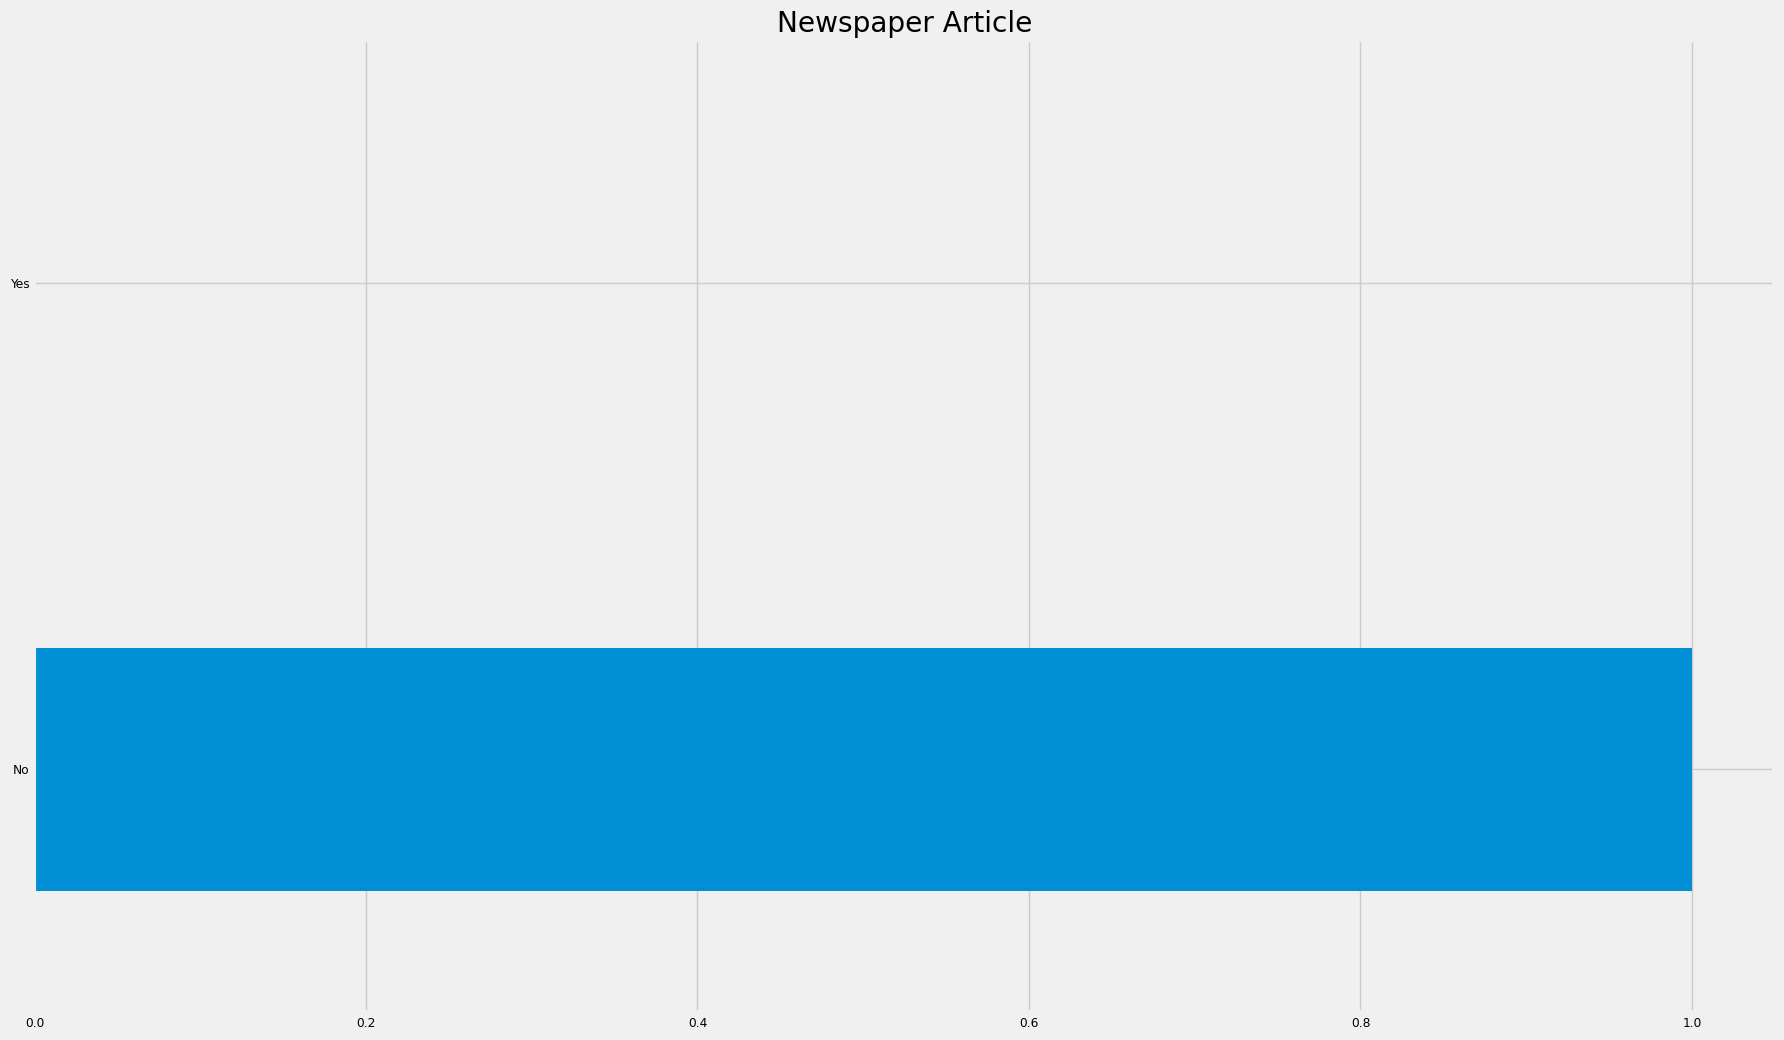

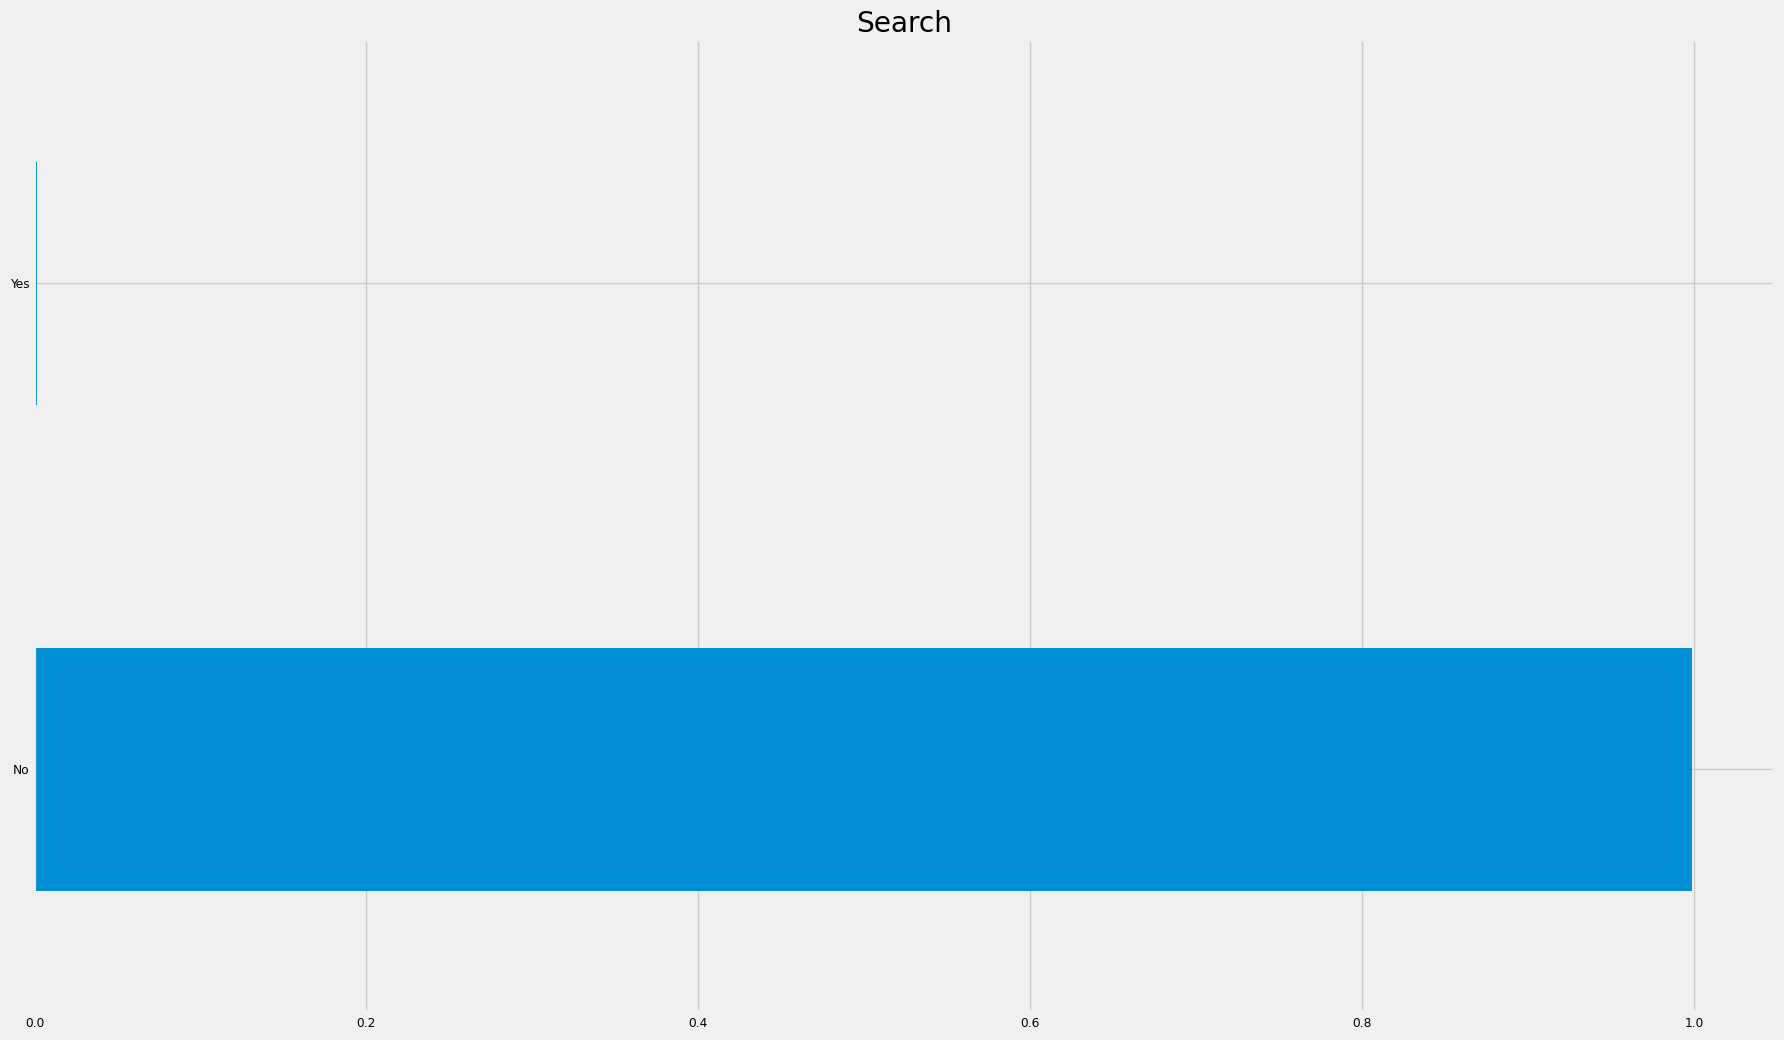

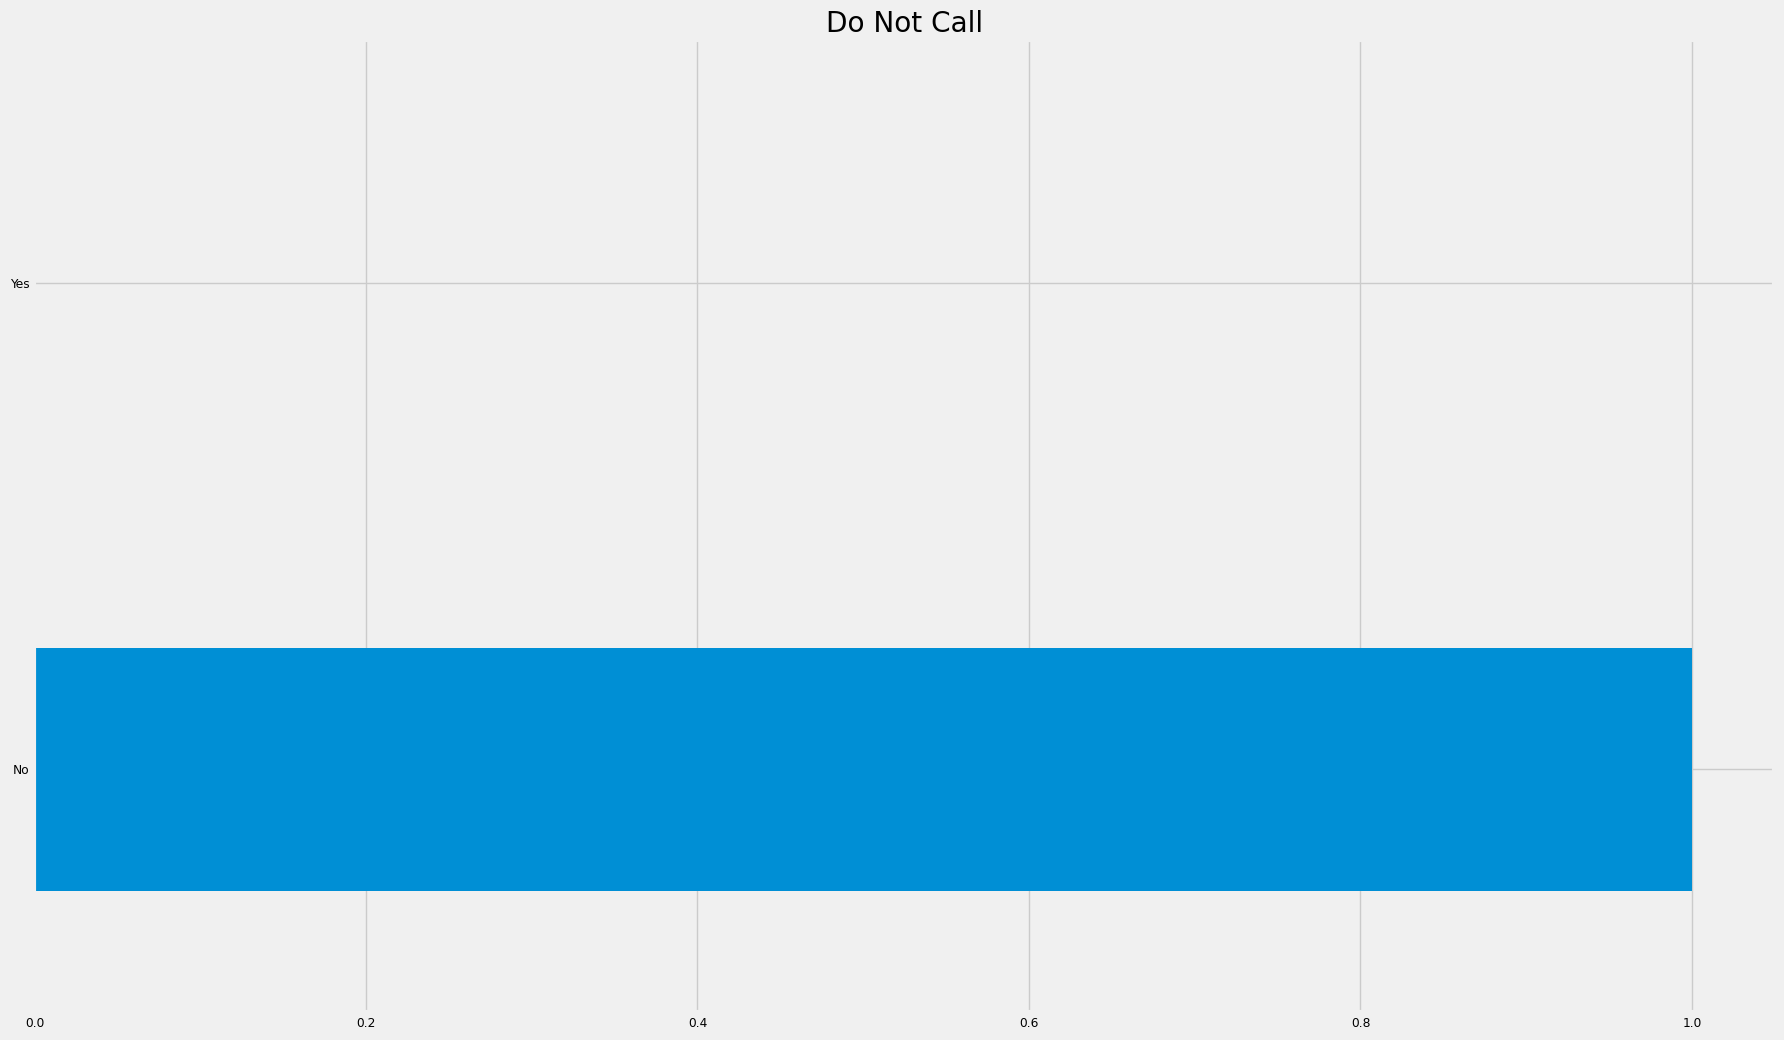

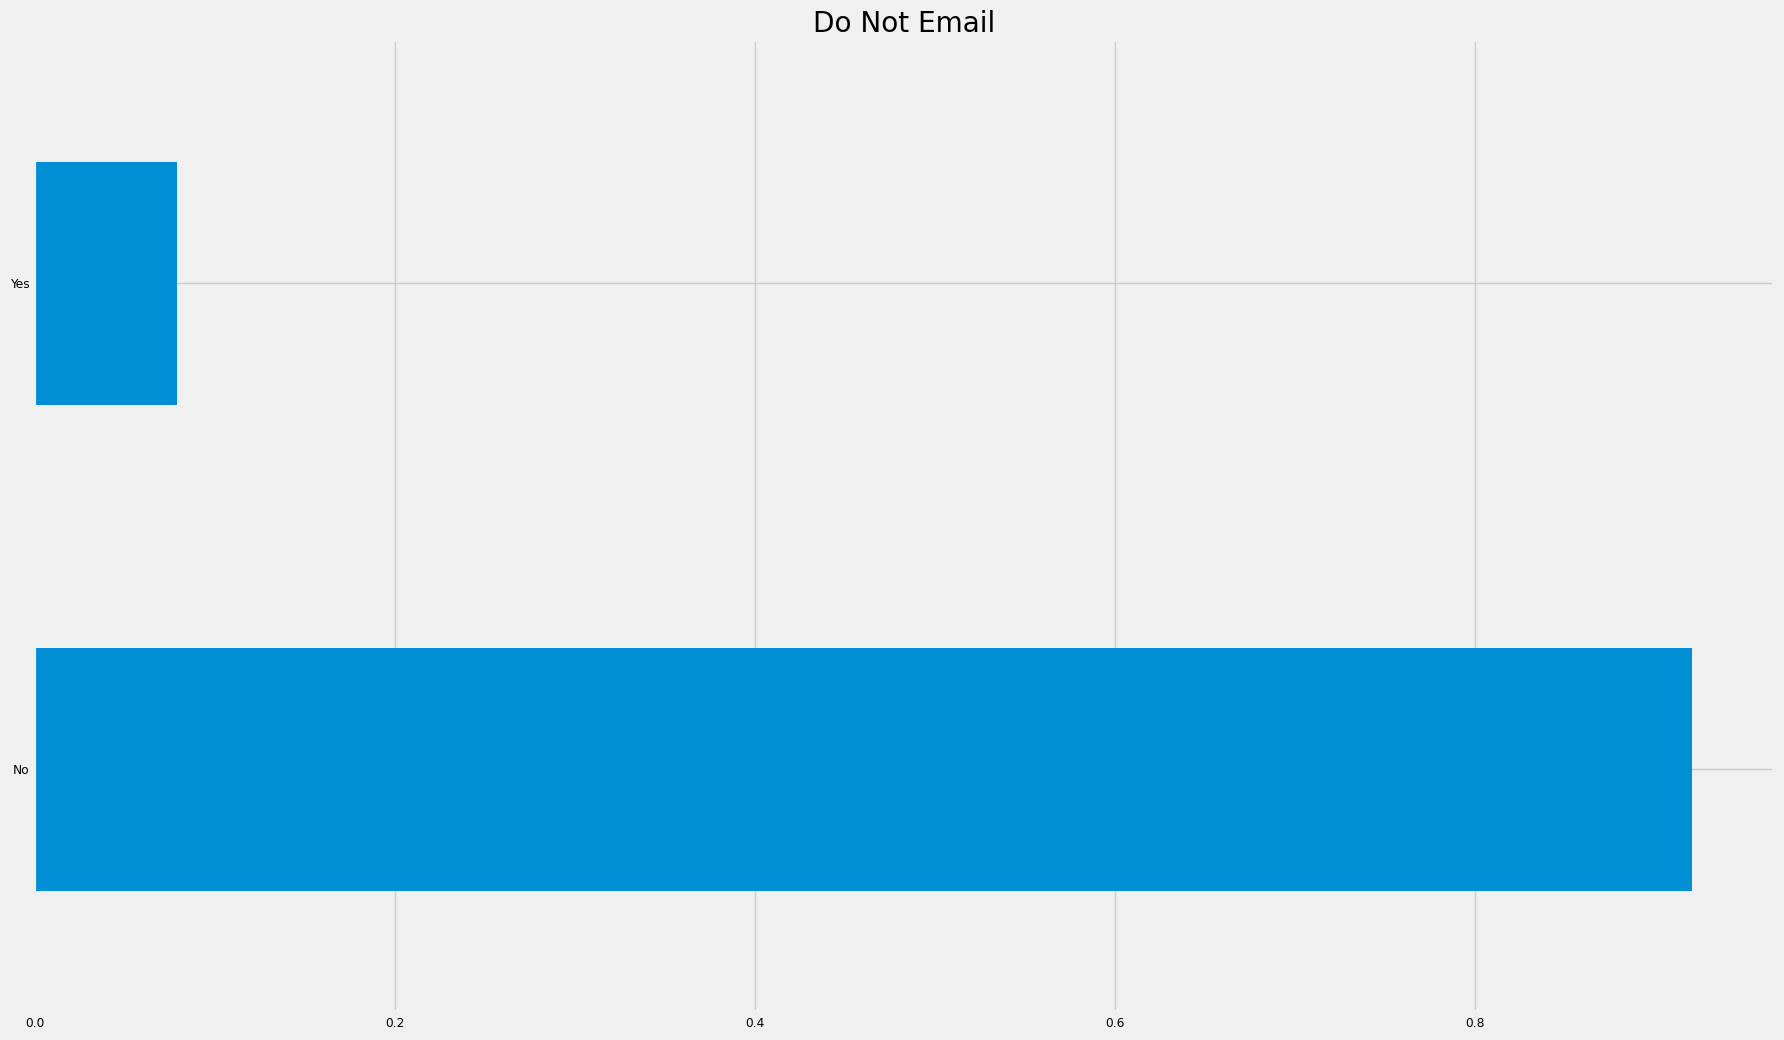

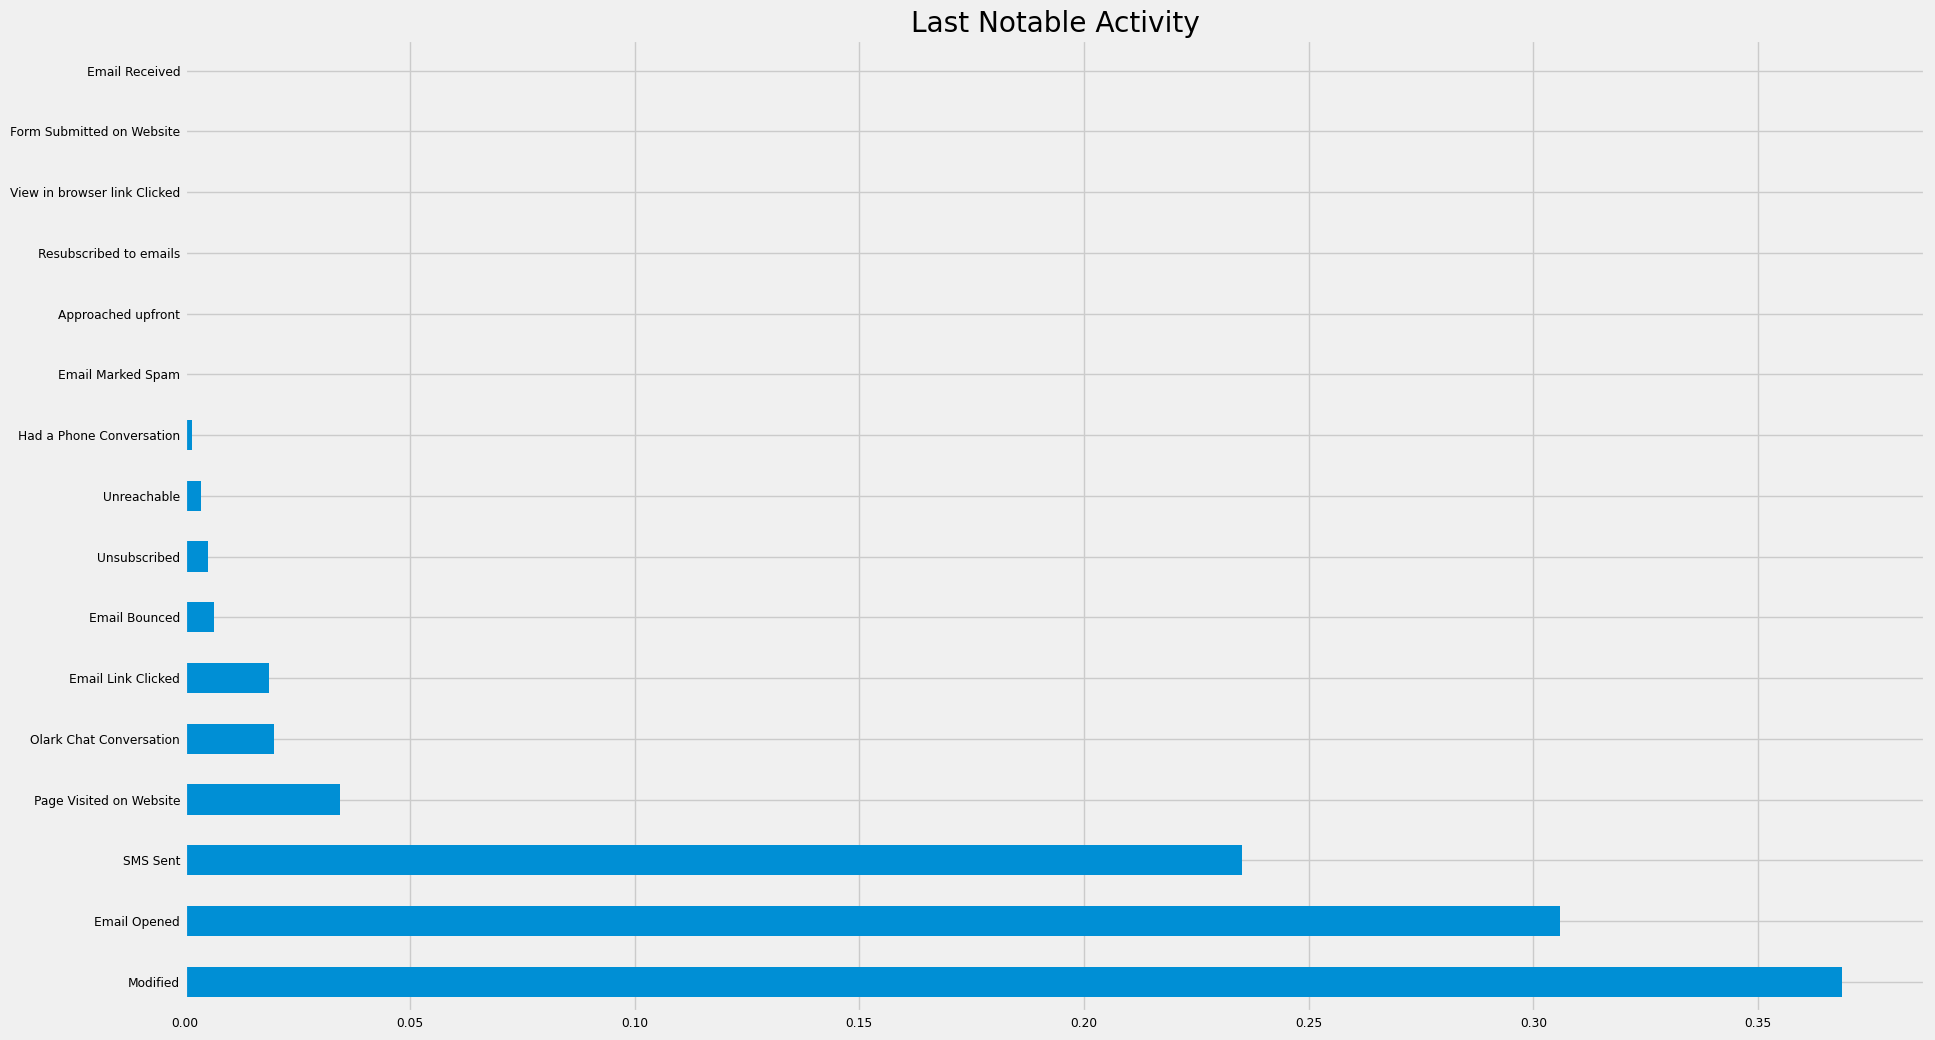

In [21]:
for each in data[data['Data Type'] == 'object']['Column Name']:
    plt.figure(figsize = (20, 12))
    plt.title(each)
    df_cat[each].value_counts(normalize = True).plot(kind = 'barh')

##### Insights From chart

1. From the above chart we can see that the columns can be grouped together
2. The columns which have high %age of values as Not Selected can be removed (30%)
3. The columns with the %age of Not Selected & any 1 value of a column > 70% can be removed as it'll cause imbalance in the data

In [22]:
lis = []
for each in data[data['Data Type'] == 'object']['Column Name']:
    # df_cat[each].value_counts(normalize = True)
    a = df_cat[each].value_counts(normalize = True).reset_index(name='new_name')
    if a[(a['index']=='Not Selected') & (a['new_name'] >= 0)]['new_name'].values > 0:
        lis.append([each,a[(a['index']=='Not Selected') & (a['new_name'] >= 0)]['new_name'].values])
        # print(a[(a['index']=='Not Selected') & (a['new_name'] >= 0)]['new_name'].values)
    else :
        continue

In [23]:
op = pd.DataFrame(lis)
op = op.rename(columns={0: 'Column Name', 1: 'Values'})
op['Values'] = op['Values'].astype(np.float)

In [24]:
not_selected_col_drop = op[op['Values']>0.3]['Column Name'].to_list()
for col in not_selected_col_drop:
    df_cat.drop([col],axis = 1 , inplace = True)

From the above chart we also see that the columns as follows can be dropped as the data is skewed these columns will not add much value
###### Search, Newspaper, Newspaper Article, Digital Advertisement,X Education Forums, Through Recommendations


From the above chart we also see that the columns as follows can be dropped as the data is skewed these columns will not add much value as the sum of Not Selected and the highest values in the column > 70%
###### Country,What matters most to you in choosing a course, What is your current occupation

In [25]:
skewed = ['Do Not Call','Do Not Email','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement','X Education Forums', 
          'Through Recommendations', 'Country','What matters most to you in choosing a course','What is your current occupation']
for col in skewed:
    df_cat.drop([col],axis = 1 , inplace = True)

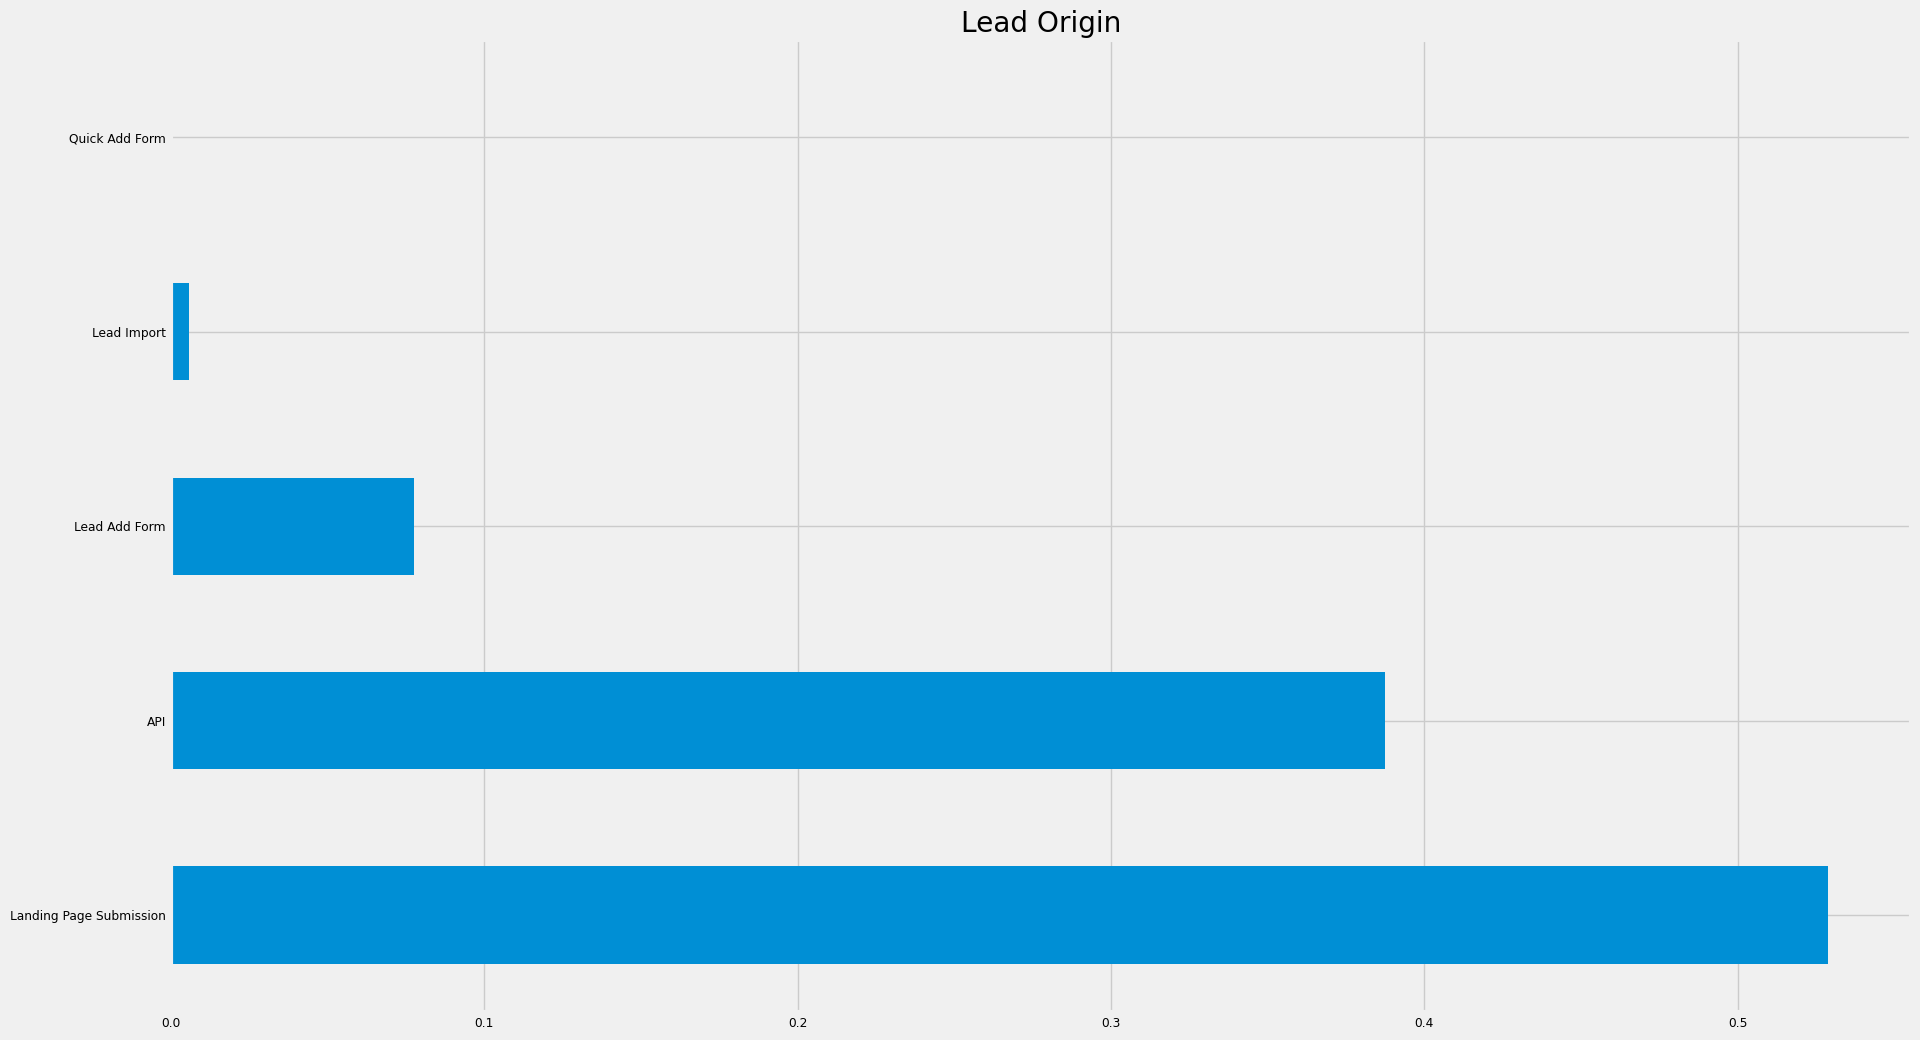

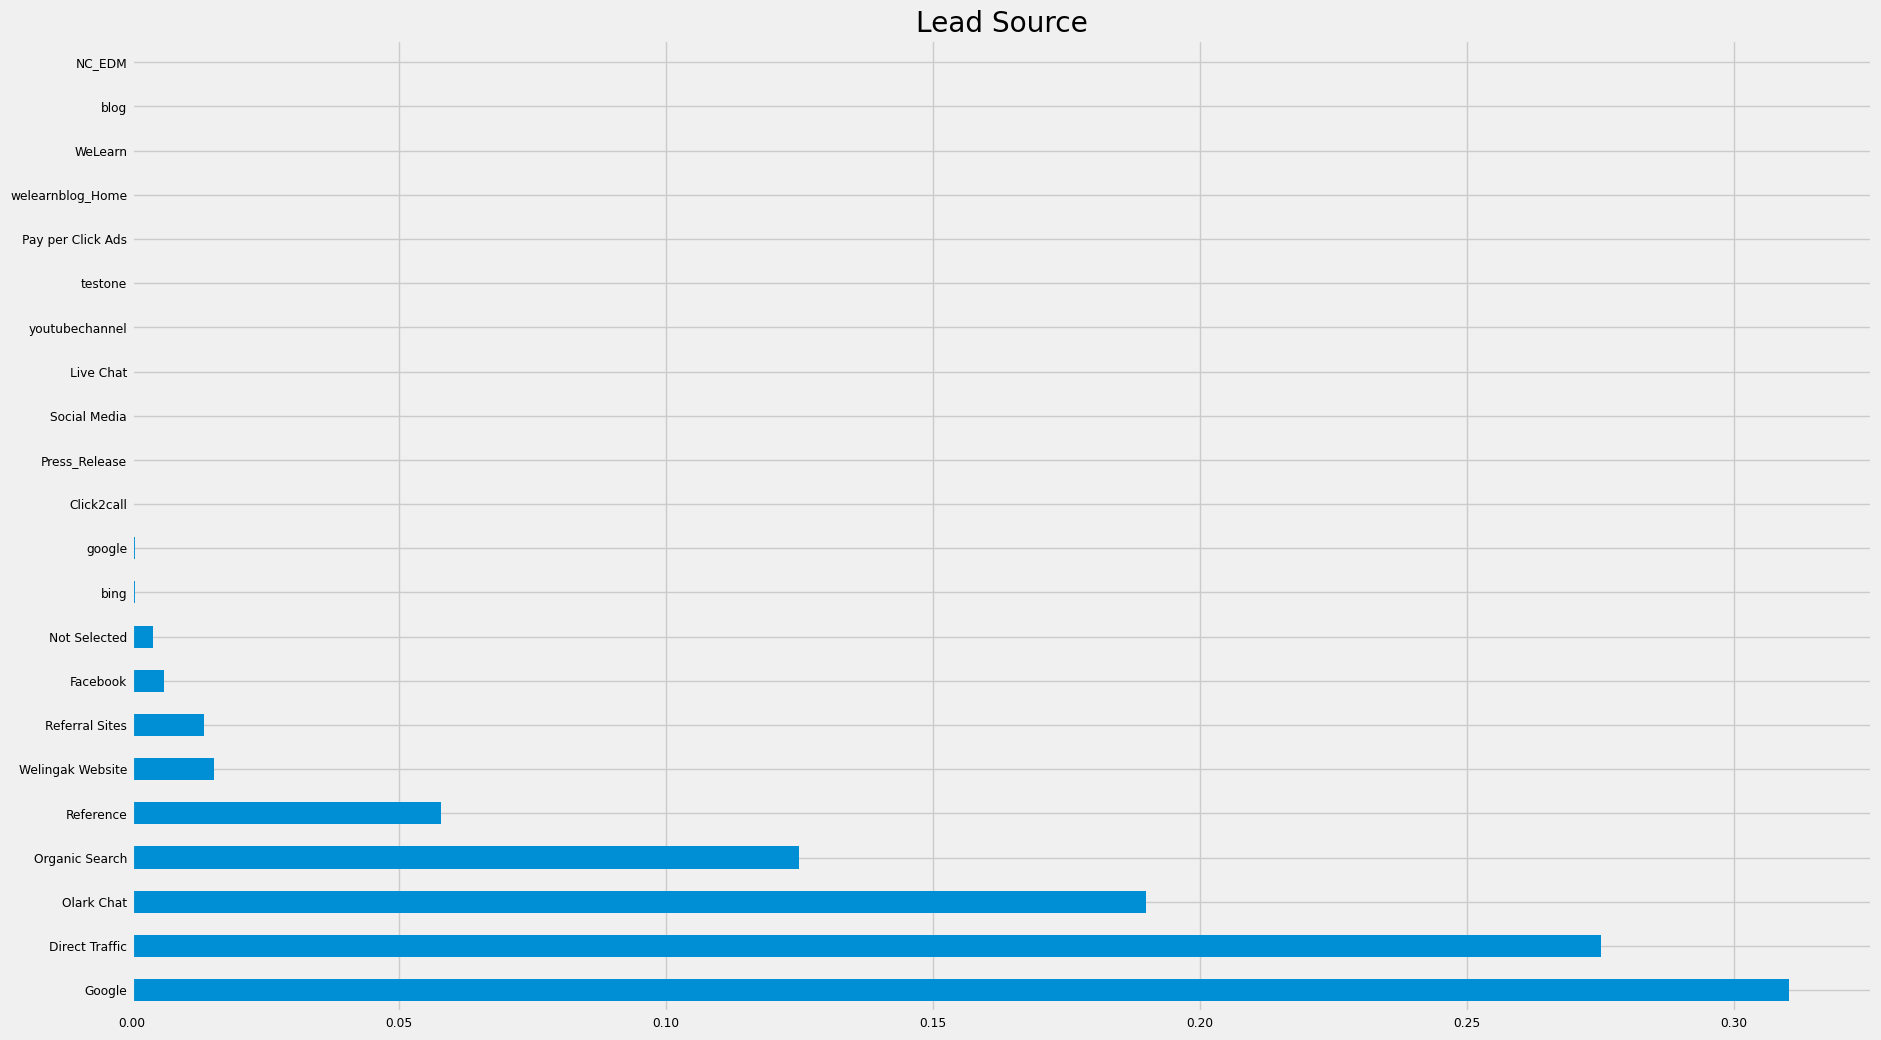

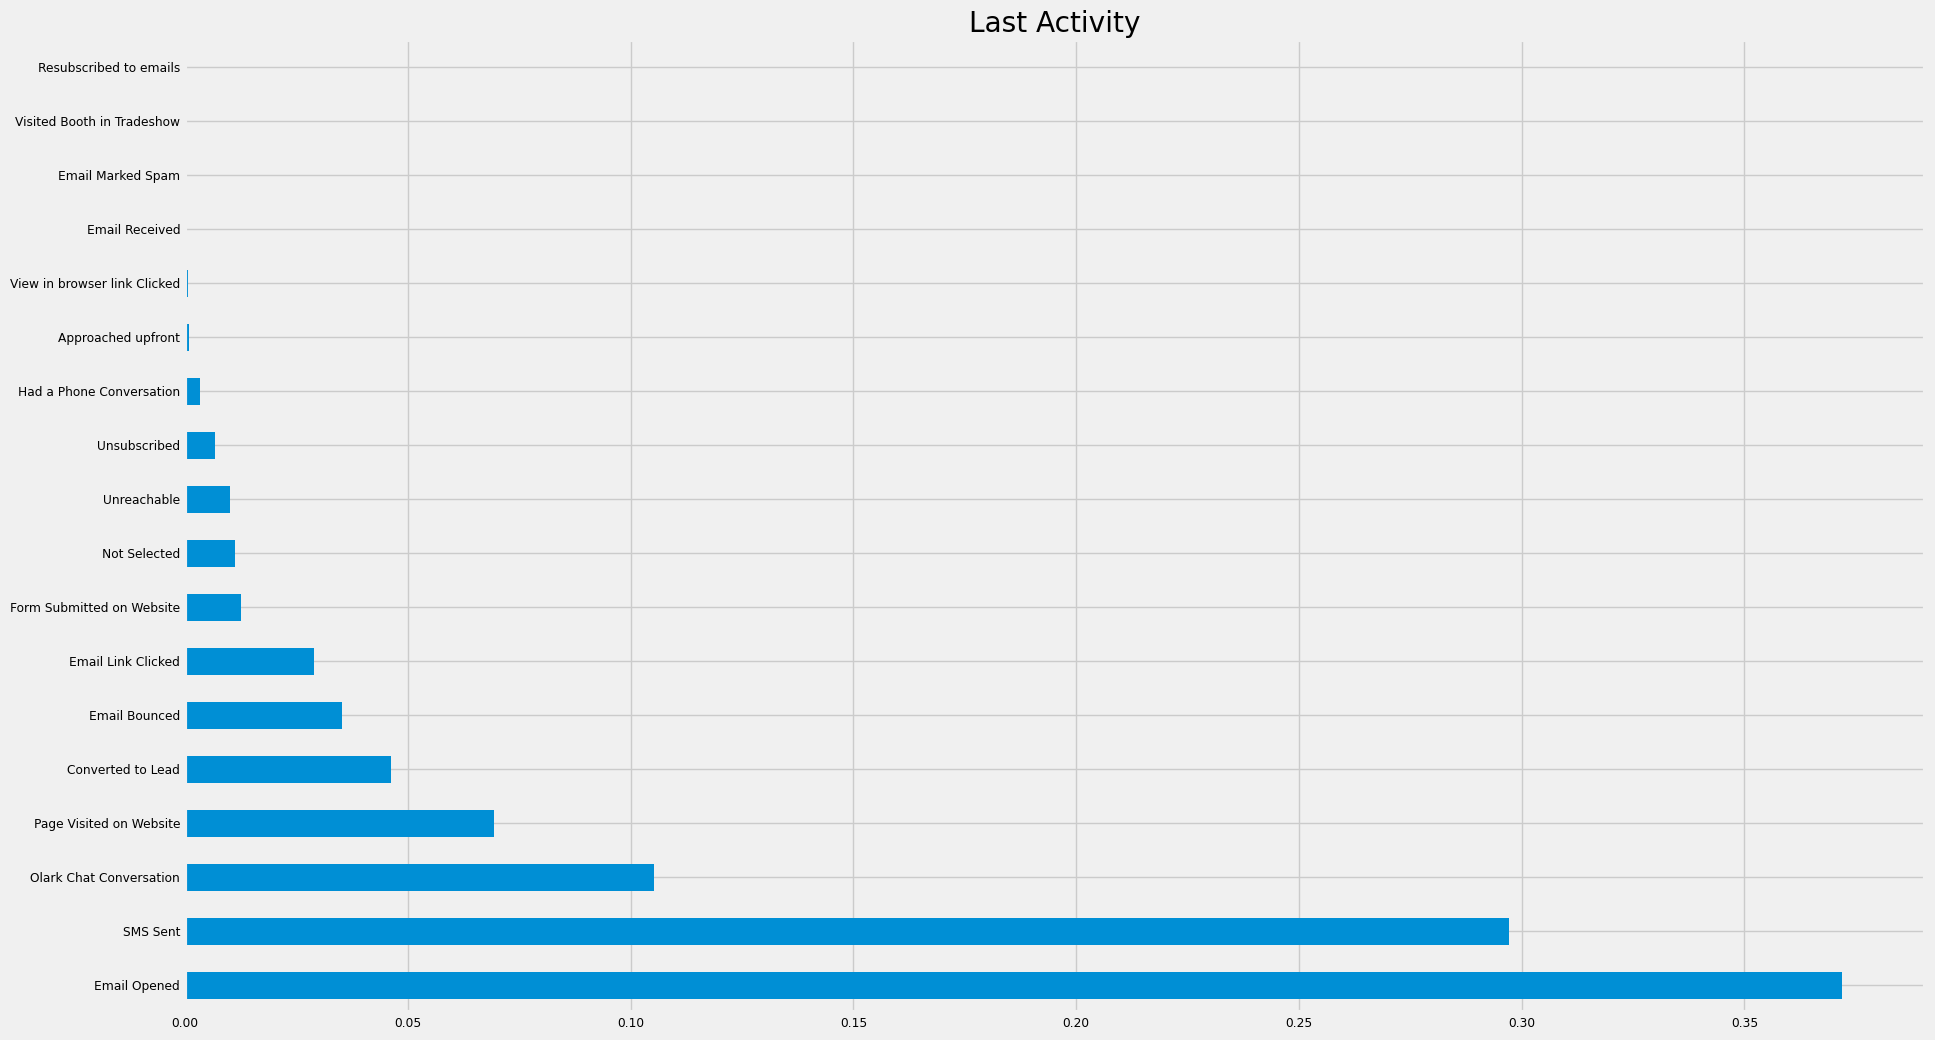

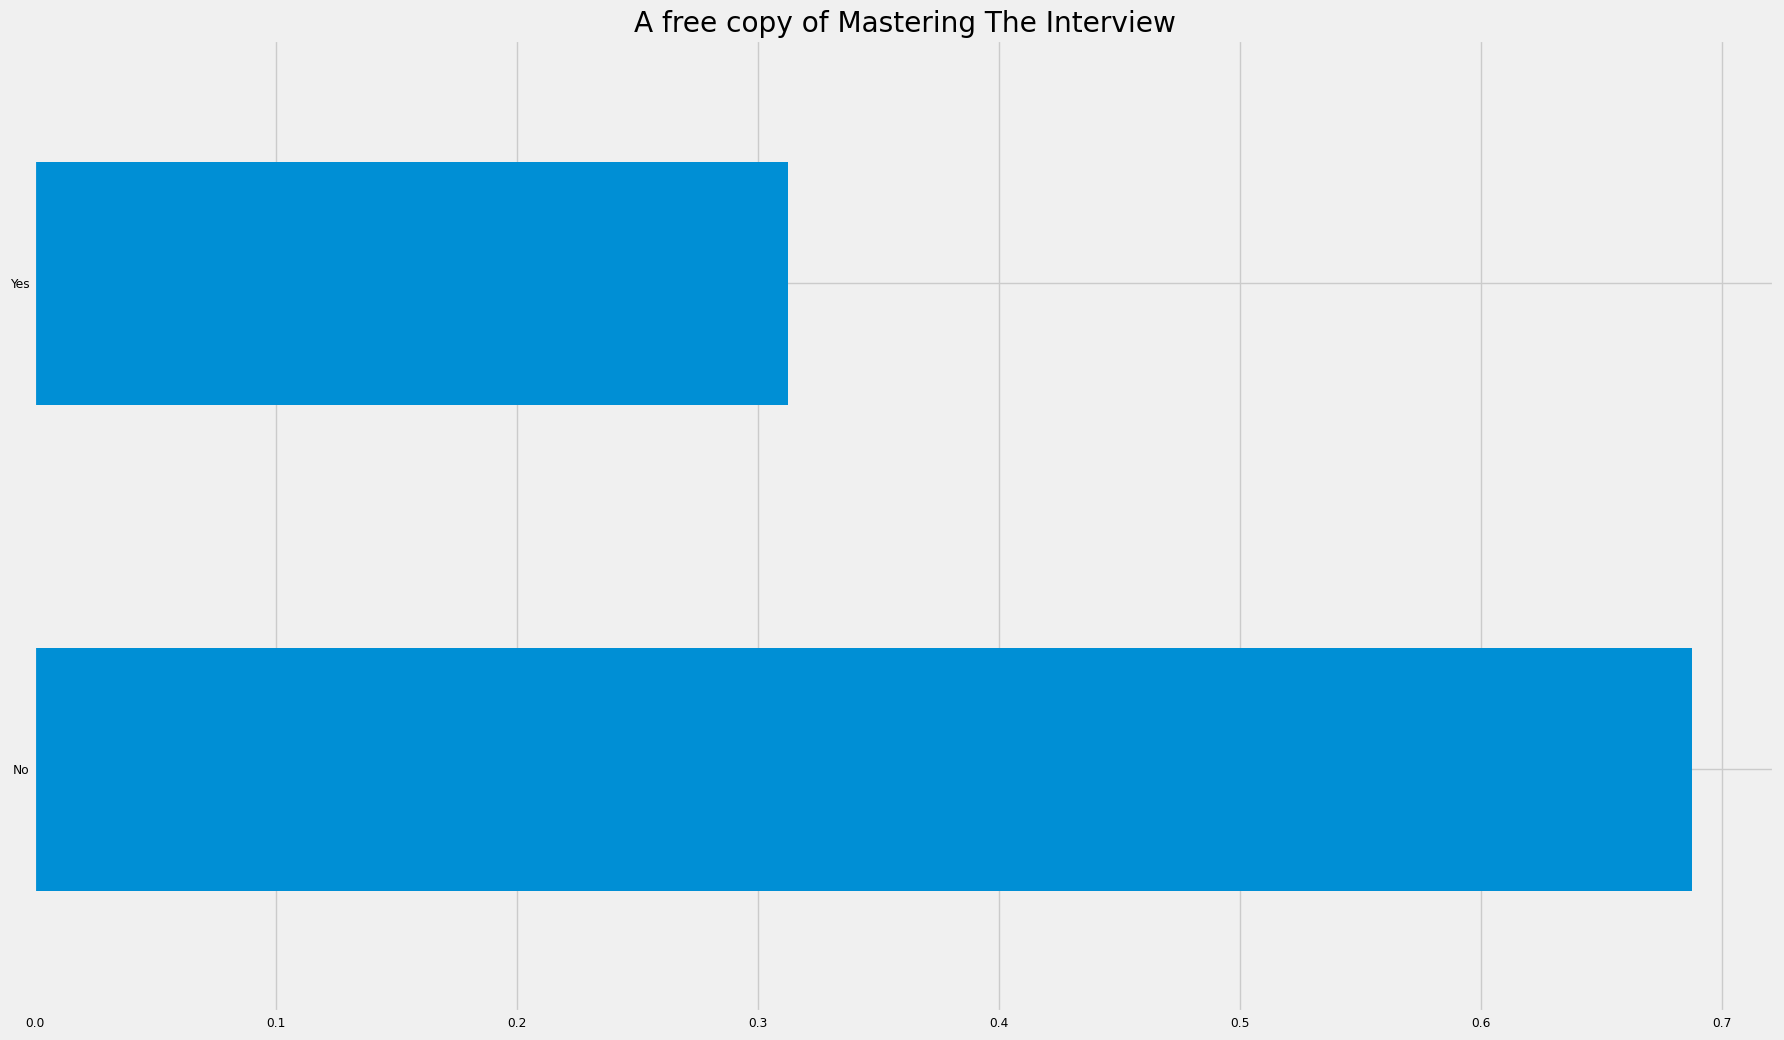

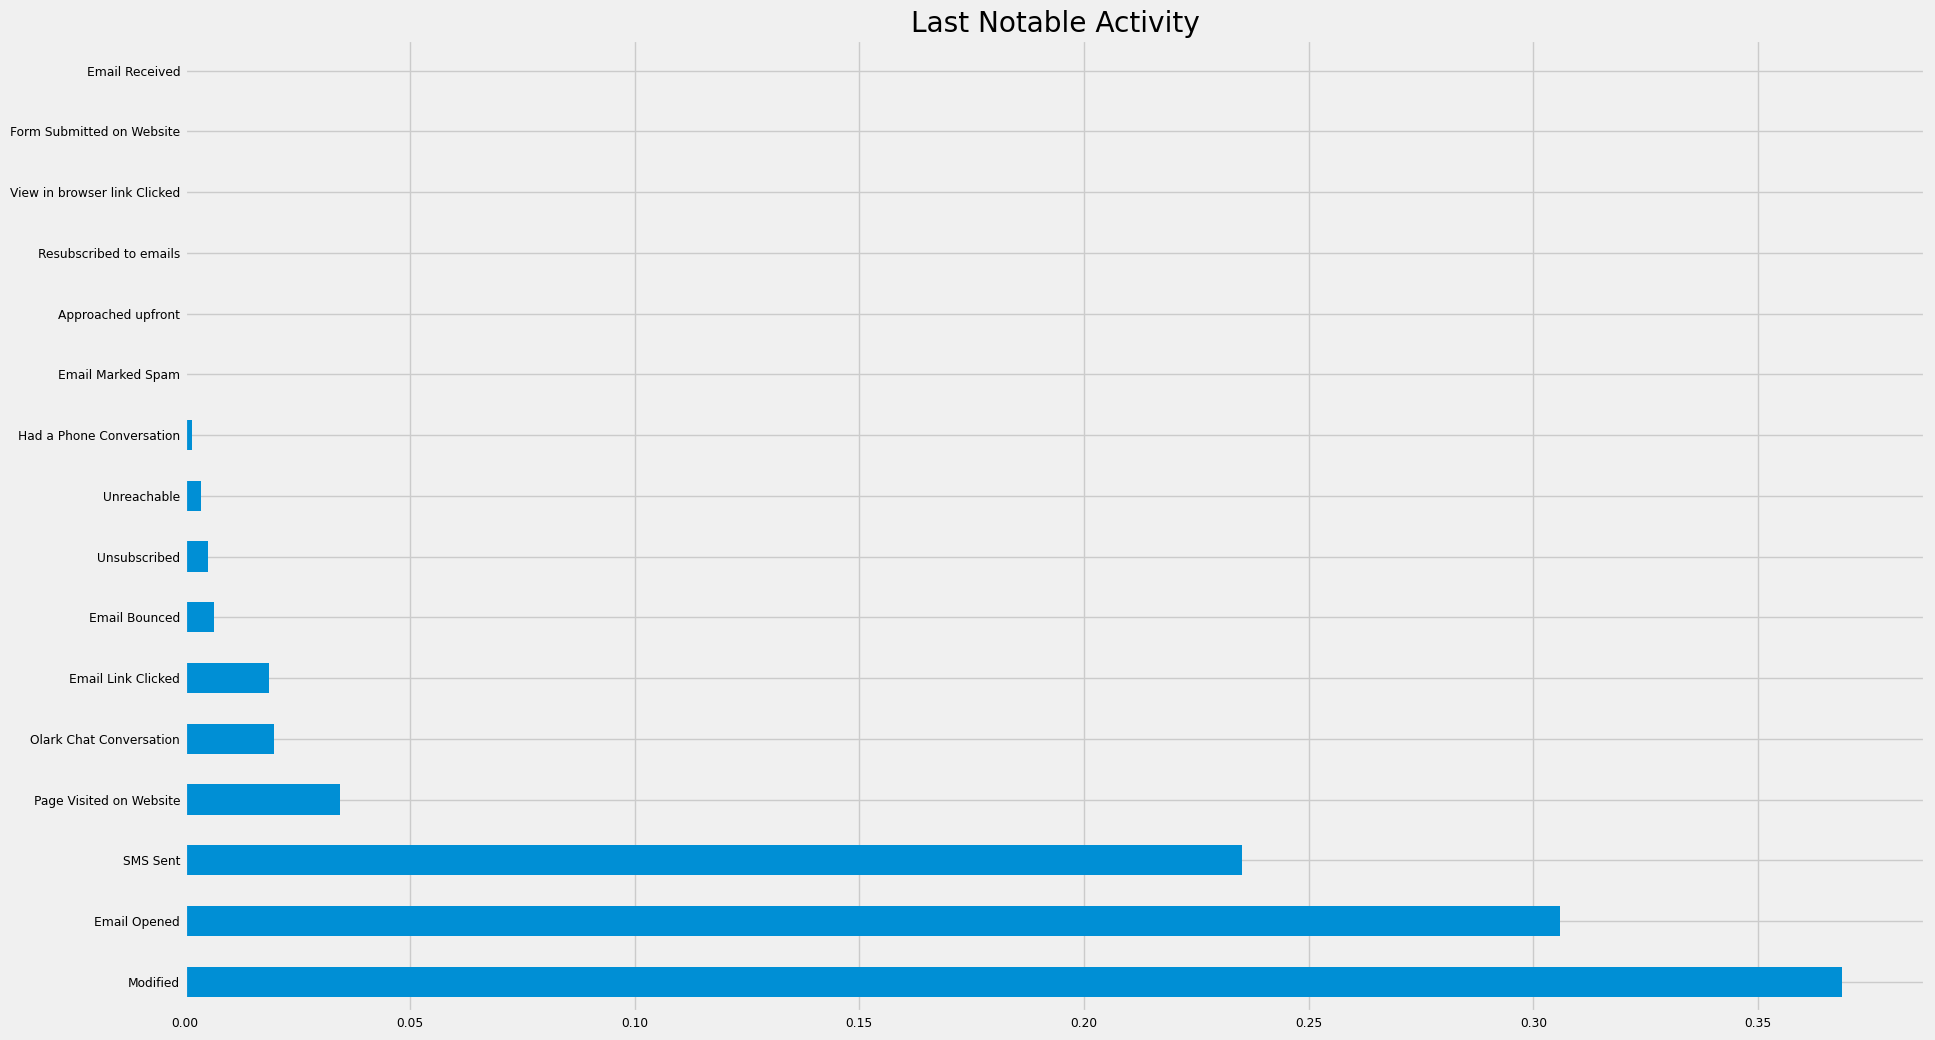

In [26]:
for each in df_cat:
    plt.figure(figsize = (20, 12))
    plt.title(each)
    df_cat[each].value_counts(normalize = True).plot(kind = 'barh')

For all the columns with Low % of Not Selected we can replace them with mode

In [27]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

# Replacing for df as it will be used to make a bivariate chart 
df['Lead Source'] = df['Lead Source'].replace(['Not Selected','google',np.nan], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['bing','google', 'Click2call','Live Chat','Press_Release',
                                                      'Social Media','testone','welearnblog_Home','WeLearn',
                                                      'blog','NC_EDM','youtubechannel','Pay per Click Ads'], 'Others')

# Replacing for df_cat as it will be used to make a new dataset
df_cat['Lead Source'] = df_cat['Lead Source'].replace(['Not Selected','google',np.nan], 'Google')
df_cat['Lead Source'] = df_cat['Lead Source'].replace(['bing','google', 'Click2call','Live Chat','Press_Release',
                                                      'Social Media','testone','welearnblog_Home','WeLearn',
                                                      'blog','NC_EDM','youtubechannel','Pay per Click Ads'], 'Others')

##### 3.2.2 Categorical BiVaritate

<Figure size 2000x1000 with 0 Axes>

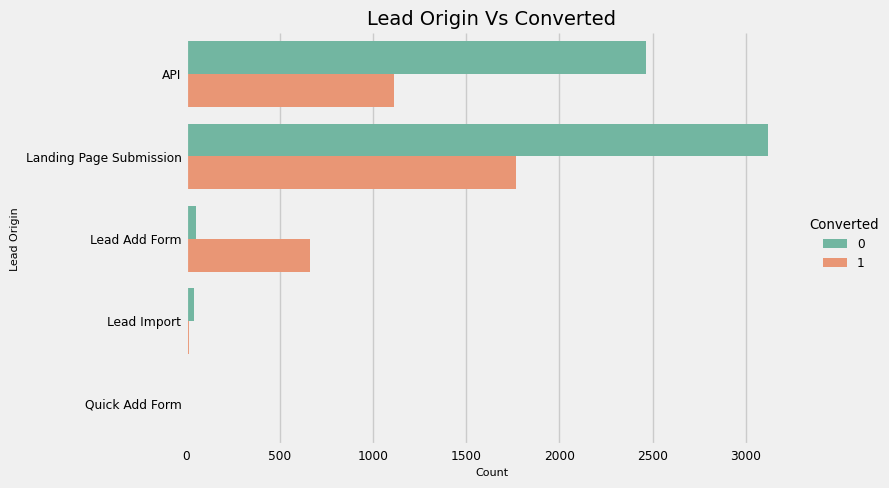

<Figure size 2000x1000 with 0 Axes>

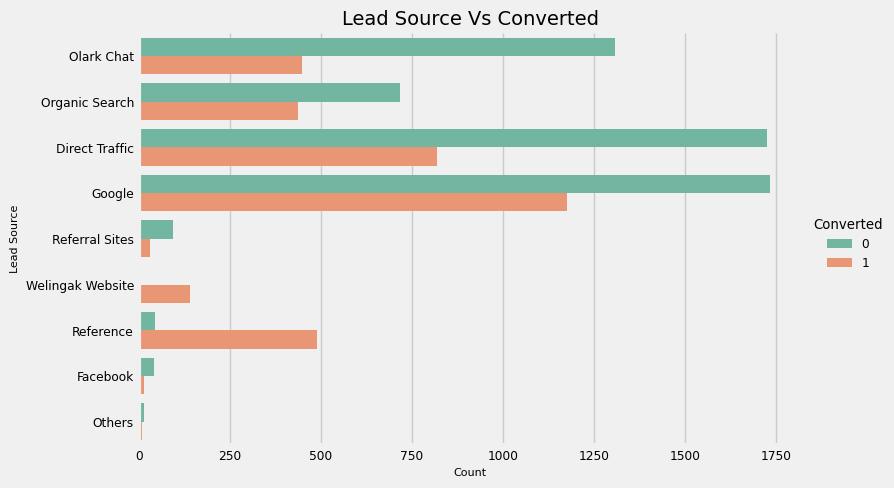

<Figure size 2000x1000 with 0 Axes>

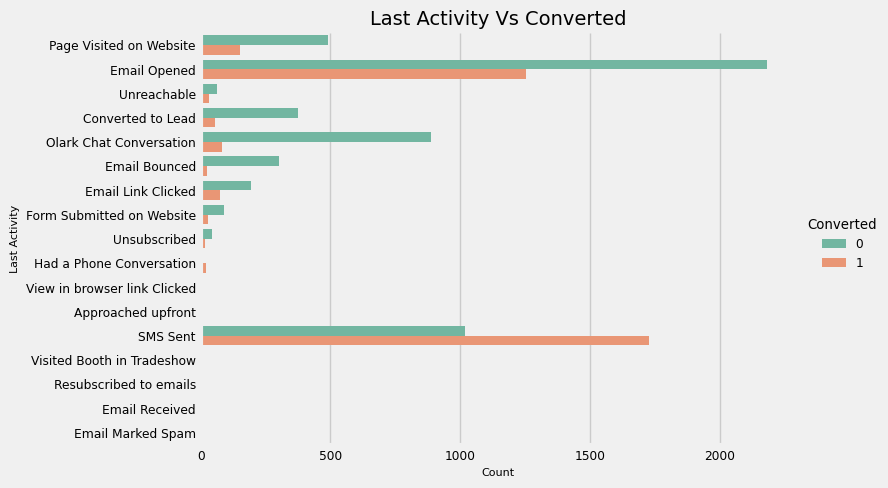

<Figure size 2000x1000 with 0 Axes>

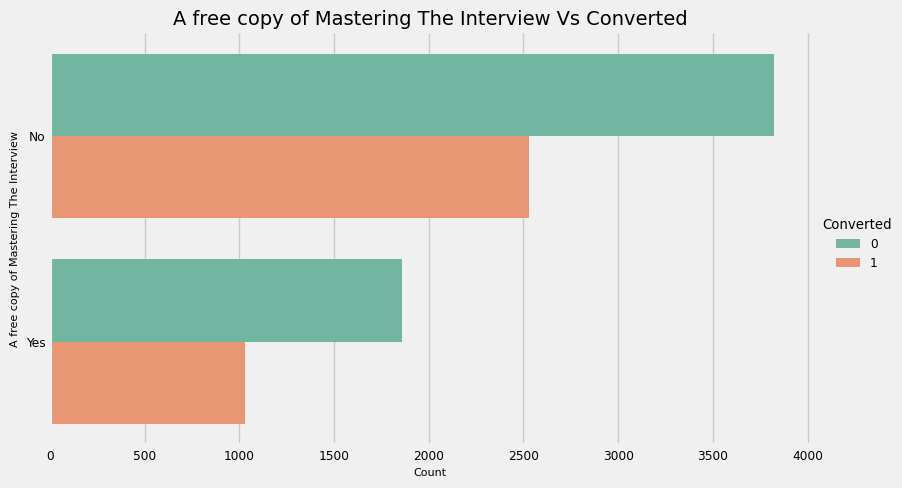

<Figure size 2000x1000 with 0 Axes>

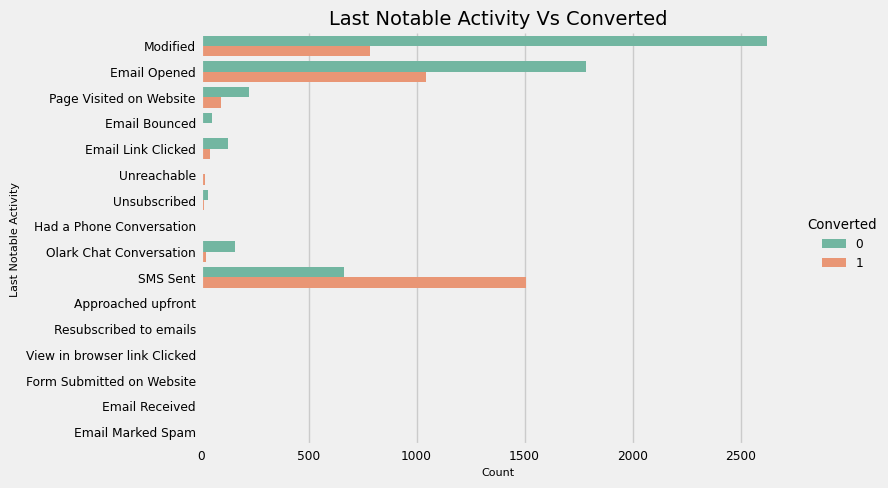

In [28]:
for each in df_cat:
    plt.figure(figsize = (20, 10))
    sns.catplot(y=each, hue = "Converted", kind="count", data=df, palette="Set2", aspect= 1.7)
    plt.title( each + ' Vs Converted', fontsize = 14)
    plt.xlabel("Count", fontsize = 8)
    plt.ylabel(each, fontsize = 8)   
plt.show()

##### 3.2.3  Numerical Data Analysis

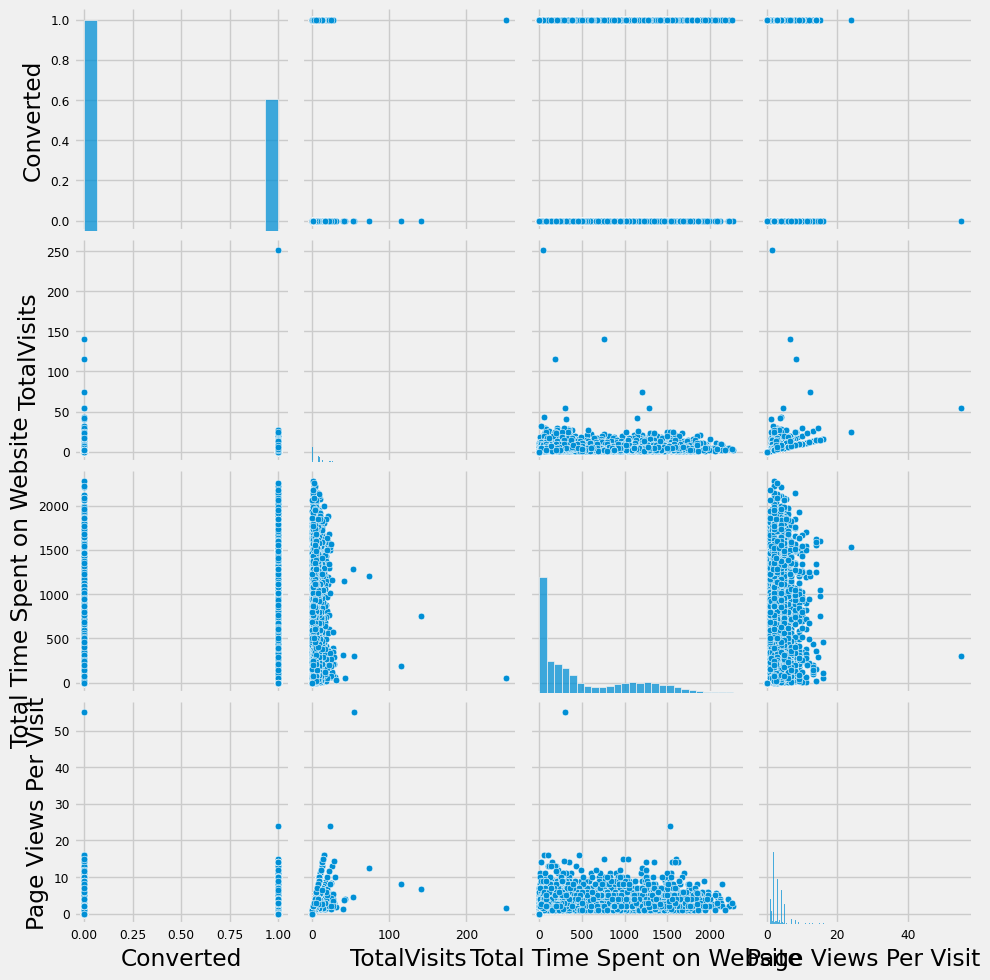

In [29]:
#Pairplots for continuous numeric variables
sns.pairplot(data=df_num)
plt.show()

In [30]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


There are outliers in data so we will cap the bottom 1% of the data to remove outliers

##### 3.2.4  Outliers Treatment

In [31]:
df_num = df_num.apply(lambda x: x.clip(upper = x.quantile(0.99)))
df_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.327814,486.510793,2.329050
std,0.486714,3.228466,544.845436,1.971347
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.372100,9.000000


##### 3.2.5 Dummy Creation

In [32]:
# An function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [33]:
for c_feature in df_cat:
    df_cat[c_feature] = df_cat[c_feature].astype('category')
    df_cat = create_dummies(df_cat, c_feature)

In [34]:
df_cat.head(2)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Selected,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_new = pd.concat([df_num, df_cat], axis = 1)

In [36]:
df_new.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Selected,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


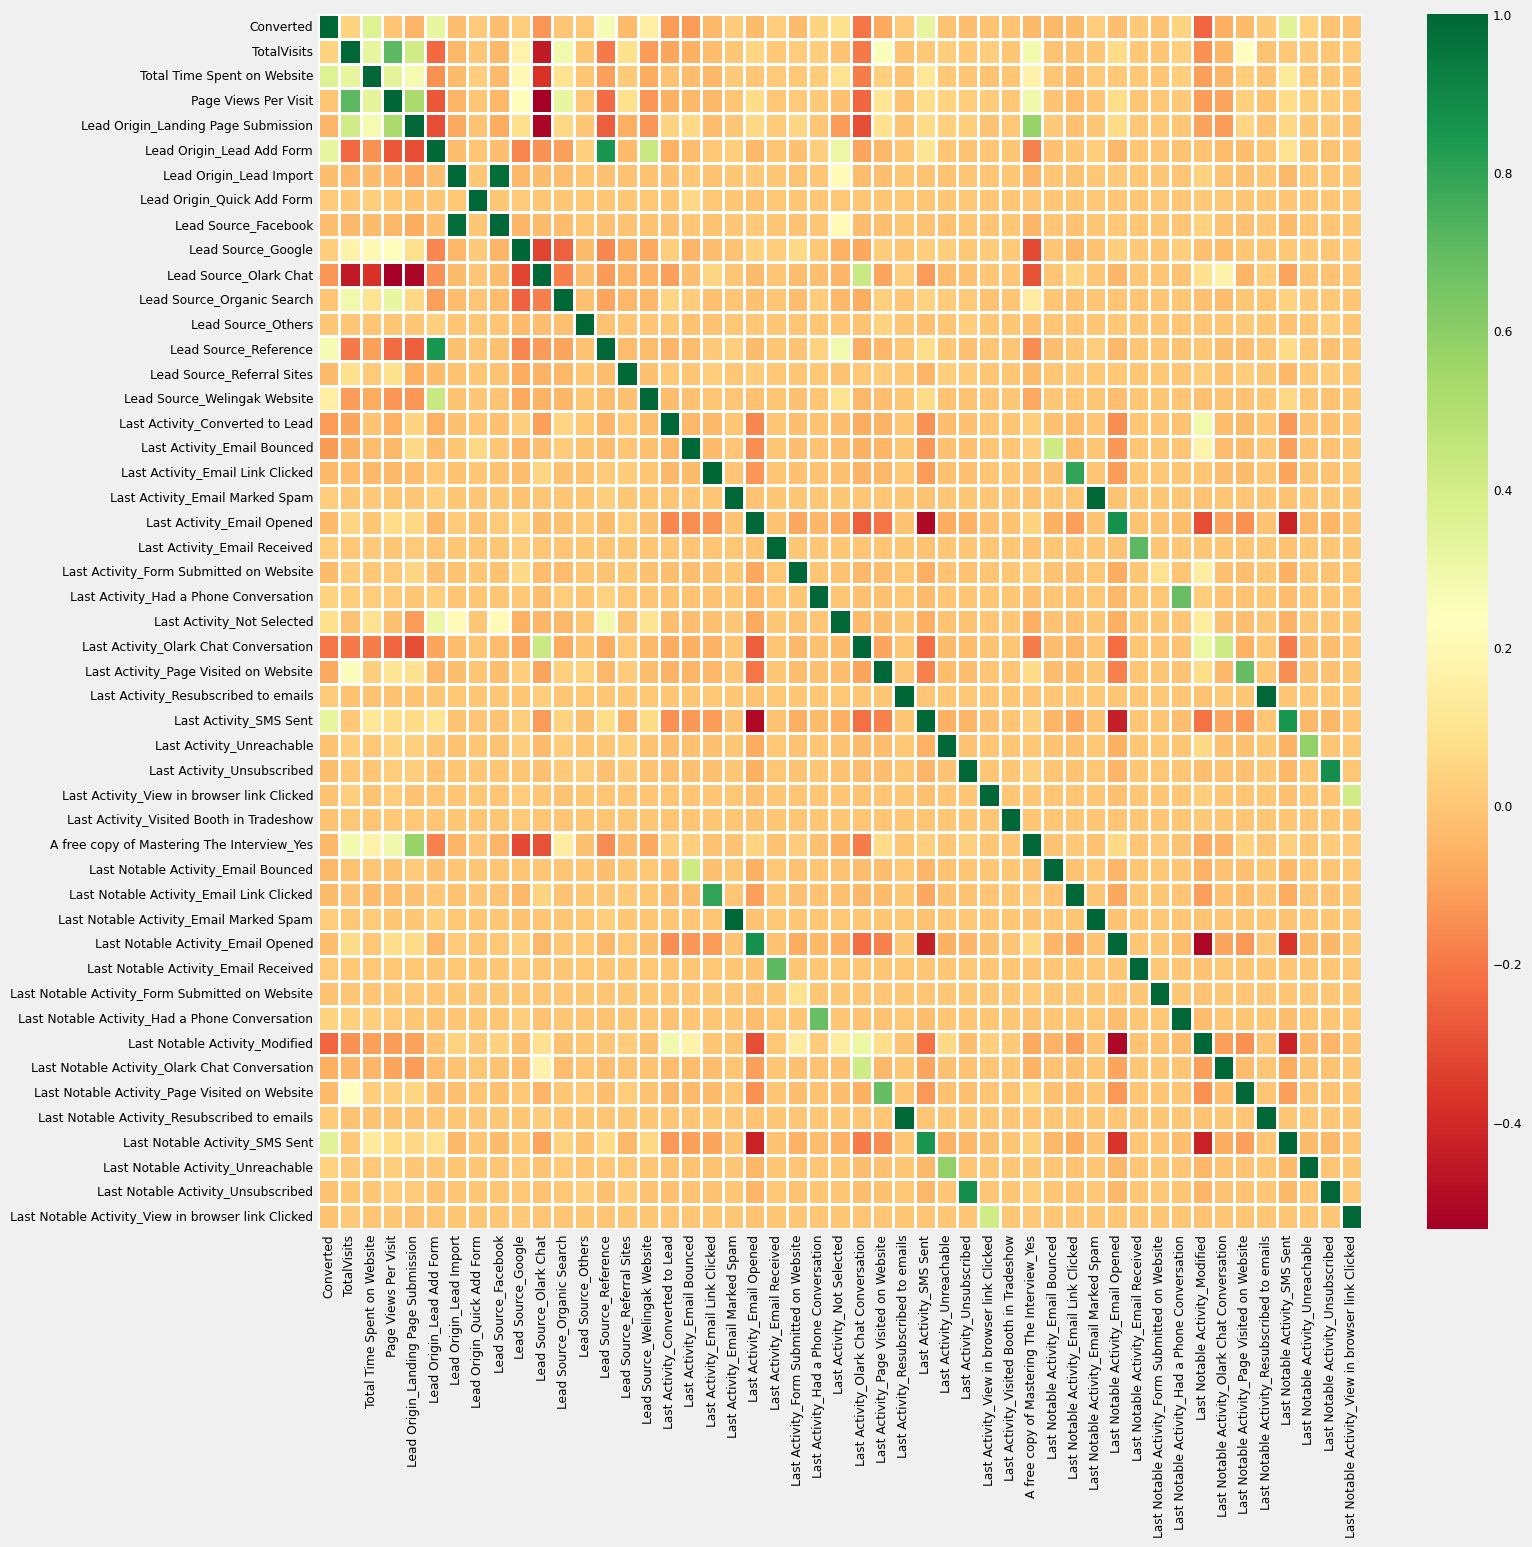

In [37]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(df_new.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [38]:
corr_lead = df_new.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

In [39]:
# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
2183,Last Notable Activity_Resubscribed to emails,Last Activity_Resubscribed to emails,1.000000
1783,Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam,1.000000
398,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
2333,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.877108
1833,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.862718


In [40]:
# Top 5 Negatively correlated variables
corr_df.tail(5)

,VAR1,VAR2,Correlation
491,Lead Source_Olark Chat,TotalVisits,-0.446415
1392,Last Activity_SMS Sent,Last Activity_Email Opened,-0.500317
2046,Last Notable Activity_Modified,Last Notable Activity_Email Opened,-0.507426
494,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
493,Lead Source_Olark Chat,Page Views Per Visit,-0.535693


### 4. Model

##### 4.1 Train - Test Split

In [41]:
from sklearn.model_selection import train_test_split
# target variable
Y = df_new['Converted']
X = df_new.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Selected,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.235294,0.264586,0.147778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.294118,0.057590,0.277778,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.294118,0.668257,0.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### 4.2 Model Building

In [43]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg)           
rfe = rfe.fit(X_train, y_train)

In [44]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 4),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Marked Spam', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity

In [45]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Not Selected',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Model 1

In [46]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.2
Date:                Mon, 19 Jun 2023   Deviance:                       5684.4
Time:                        21:38:19   Pearson chi2:                 6.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3627
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7733      0.196     -9.069      0.000      -2.156      -1.390
TotalVisits                                        1.4498      0.241      6.007      0.000       0.977       1.923
Total Time Spent on Website                        3.8172      0.131     29.208      0.000       3.561       4.073
Page Views Per Visit                              -1.0394      0.235     -4.430      0.000      -1.499      -0.580
Lead Origin_Lead Add Form                          3.1165      0.497      6.266      0.000       2.142       4.091
Lead Origin_Quick Add Form                        22.4516   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                             1.1108      0.119      9.328      0.000       0.877       1.344
Lead Source_Reference                              1.1046      0.523      2.111      0.035       0.079       2.130
Lead Source_Welingak Website                       2.4836      0.871      2.853      0.004       0.777       4.190
Last Activity_Email Bounced                       -1.5539      0.324     -4.797      0.000      -2.189      -0.919
Last Activity_Email Opened                         0.8211      0.170      4.832      0.000       0.488       1.154
Last Activity_Email Received                      21.8105   2.06e+04      0.001      0.999   -4.03e+04    4.04e+04
Last Activity_Had a Phone Conversation             1.7644      0.833      2.117      0.034       0.131       3.398
Last Activity_Not Selected                        -0.6676      0.452     -1.478      0.139      -1.553       0.218
Last Activity_Olark Chat Conversation             -0.5759      0.212     -2.723      0.006      -0.990      -0.161
Last Activity_SMS Sent                             0.9765      0.169      5.768      0.000       0.645       1.308
Last Activity_Unsubscribed                        -0.6438      0.448     -1.438      0.151      -1.522       0.234
Last Notable Activity_Email Link Clicked          -0.8628      0.309     -2.793      0.005      -1.468      -0.257
Last Notable Activity_Email Opened                -1.1462      0.191     -5.990      0.000      -1.521      -0.771
Last Notable Activity_Had a Phone Conversation     1.1607      1.378      0.842      0.400      -1.540       3.862
Last Notable Activity_Modified                    -1.4005      0.137    -10.257      0.000      -1.668      -1.133
Last Notable Activity_Olark Chat Conversation     -1.2523      0.382     -3.282      0.001      -2.000      -0.504
Last Notable Activity_Page Visited on Website     -1.0568      0.255     -4.140      0.000      -1.557      -0.556
Last Notable Activity_Resubscribed to emails      22.2286   2.92e+04      0.001      0.999   

In [47]:
rfe_col = rfe_col.drop('Last Activity_Email Received',1)

Model 2

In [48]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Mon, 19 Jun 2023   Deviance:                       5687.7
Time:                        21:38:19   Pearson chi2:                 6.61e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3624
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7505      0.195     -8.996      0.000      -2.132      -1.369
TotalVisits                                        1.4549      0.241      6.029      0.000       0.982       1.928
Total Time Spent on Website                        3.8200      0.131     29.230      0.000       3.564       4.076
Page Views Per Visit                              -1.0426      0.235     -4.444      0.000      -1.502      -0.583
Lead Origin_Lead Add Form                          3.1180      0.498      6.267      0.000       2.143       4.093
Lead Origin_Quick Add Form                        21.4541   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                             1.1112      0.119      9.331      0.000       0.878       1.345
Lead Source_Reference                              1.1040      0.523      2.109      0.035       0.078       2.130
Lead Source_Welingak Website                       2.4833      0.871      2.852      0.004       0.777       4.190
Last Activity_Email Bounced                       -1.5727      0.324     -4.858      0.000      -2.207      -0.938
Last Activity_Email Opened                         0.8066      0.169      4.761      0.000       0.474       1.139
Last Activity_Had a Phone Conversation             1.7499      0.833      2.100      0.036       0.117       3.383
Last Activity_Not Selected                        -0.6829      0.452     -1.513      0.130      -1.568       0.202
Last Activity_Olark Chat Conversation             -0.5901      0.211     -2.795      0.005      -1.004      -0.176
Last Activity_SMS Sent                             0.9546      0.168      5.668      0.000       0.624       1.285
Last Activity_Unsubscribed                        -0.6664      0.448     -1.489      0.136      -1.544       0.211
Last Notable Activity_Email Link Clicked          -0.8865      0.308     -2.875      0.004      -1.491      -0.282
Last Notable Activity_Email Opened                -1.1557      0.191     -6.044      0.000      -1.530      -0.781
Last Notable Activity_Had a Phone Conversation     1.1516      1.378      0.836      0.403      -1.550       3.853
Last Notable Activity_Modified                    -1.4099      0.136    -10.341      0.000      -1.677      -1.143
Last Notable Activity_Olark Chat Conversation     -1.2623      0.382     -3.308      0.001      -2.010      -0.515
Last Notable Activity_Page Visited on Website     -1.0823      0.255     -4.251      0.000      -1.581      -0.583
Last Notable Activity_Resubscribed to emails      21.2054   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                  1.2073      0.523      2.310      0.021   

In [49]:
rfe_col = rfe_col.drop('Lead Origin_Quick Add Form',1)

Model 3

In [50]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.1
Date:                Mon, 19 Jun 2023   Deviance:                       5690.1
Time:                        21:38:19   Pearson chi2:                 6.60e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3621
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7567      0.195     -9.032      0.000      -2.138      -1.376
TotalVisits                                        1.4543      0.241      6.026      0.000       0.981       1.927
Total Time Spent on Website                        3.8252      0.131     29.274      0.000       3.569       4.081
Page Views Per Visit                              -1.0445      0.235     -4.452      0.000      -1.504      -0.585
Lead Origin_Lead Add Form                          3.1077      0.496      6.265      0.000       2.135       4.080
Lead Source_Olark Chat                             1.1116      0.119      9.335      0.000       0.878       1.345
Lead Source_Reference                              1.1125      0.522      2.130      0.033       0.089       2.136
Lead Source_Welingak Website                       2.4910      0.870      2.864      0.004       0.786       4.196
Last Activity_Email Bounced                       -1.5109      0.317     -4.771      0.000      -2.132      -0.890
Last Activity_Email Opened                         0.8069      0.169      4.762      0.000       0.475       1.139
Last Activity_Had a Phone Conversation             1.7500      0.833      2.100      0.036       0.117       3.383
Last Activity_Not Selected                        -0.6804      0.451     -1.507      0.132      -1.565       0.204
Last Activity_Olark Chat Conversation             -0.5896      0.211     -2.792      0.005      -1.003      -0.176
Last Activity_SMS Sent                             0.9592      0.168      5.698      0.000       0.629       1.289
Last Activity_Unsubscribed                        -0.6612      0.447     -1.478      0.140      -1.538       0.216
Last Notable Activity_Email Link Clicked          -0.8808      0.308     -2.857      0.004      -1.485      -0.277
Last Notable Activity_Email Opened                -1.1507      0.191     -6.021      0.000      -1.525      -0.776
Last Notable Activity_Had a Phone Conversation     1.1579      1.378      0.840      0.401      -1.544       3.859
Last Notable Activity_Modified                    -1.4050      0.136    -10.319      0.000      -1.672      -1.138
Last Notable Activity_Olark Chat Conversation     -1.2578      0.382     -3.297      0.001      -2.006      -0.510
Last Notable Activity_Page Visited on Website     -1.0771      0.255     -4.232      0.000      -1.576      -0.578
Last Notable Activity_Resubscribed to emails      21.2112   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                  1.2135      0.523      2.321      0.020       0.189       2.238
=============================================================================================

In [51]:
rfe_col = rfe_col.drop('Last Notable Activity_Resubscribed to emails',1)

Model 4

In [52]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.1
Date:                Mon, 19 Jun 2023   Deviance:                       5692.2
Time:                        21:38:20   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3619
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7368      0.194     -8.961      0.000      -2.117      -1.357
TotalVisits                                        1.4538      0.241      6.024      0.000       0.981       1.927
Total Time Spent on Website                        3.8249      0.131     29.272      0.000       3.569       4.081
Page Views Per Visit                              -1.0438      0.235     -4.449      0.000      -1.504      -0.584
Lead Origin_Lead Add Form                          3.1091      0.496      6.266      0.000       2.137       4.082
Lead Source_Olark Chat                             1.1162      0.119      9.378      0.000       0.883       1.349
Lead Source_Reference                              1.1125      0.522      2.130      0.033       0.089       2.136
Lead Source_Welingak Website                       2.4911      0.870      2.864      0.004       0.786       4.196
Last Activity_Email Bounced                       -1.5243      0.317     -4.815      0.000      -2.145      -0.904
Last Activity_Email Opened                         0.7975      0.169      4.715      0.000       0.466       1.129
Last Activity_Had a Phone Conversation             1.7415      0.833      2.090      0.037       0.108       3.375
Last Activity_Not Selected                        -0.6900      0.451     -1.528      0.126      -1.575       0.195
Last Activity_Olark Chat Conversation             -0.6009      0.211     -2.850      0.004      -1.014      -0.188
Last Activity_SMS Sent                             0.9408      0.168      5.609      0.000       0.612       1.269
Last Activity_Unsubscribed                        -0.6803      0.447     -1.521      0.128      -1.557       0.196
Last Notable Activity_Email Link Clicked          -0.9025      0.308     -2.932      0.003      -1.506      -0.299
Last Notable Activity_Email Opened                -1.1621      0.191     -6.085      0.000      -1.536      -0.788
Last Notable Activity_Had a Phone Conversation     1.1463      1.378      0.832      0.406      -1.555       3.848
Last Notable Activity_Modified                    -1.4167      0.136    -10.416      0.000      -1.683      -1.150
Last Notable Activity_Olark Chat Conversation     -1.2694      0.381     -3.328      0.001      -2.017      -0.522
Last Notable Activity_Page Visited on Website     -1.0974      0.254     -4.320      0.000      -1.595      -0.599
Last Notable Activity_Unreachable                  1.1929      0.522      2.283      0.022       0.169       2.217
==================================================================================================================
"""

In [53]:
rfe_col = rfe_col.drop('Last Notable Activity_Had a Phone Conversation',1)

Model 5

In [54]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.5
Date:                Mon, 19 Jun 2023   Deviance:                       5693.0
Time:                        21:38:20   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3619
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7244      0.193     -8.921      0.000      -2.103      -1.346
TotalVisits                                       1.4590      0.241      6.054      0.000       0.987       1.931
Total Time Spent on Website                       3.8226      0.131     29.266      0.000       3.567       4.079
Page Views Per Visit                             -1.0459      0.235     -4.460      0.000      -1.506      -0.586
Lead Origin_Lead Add Form                         3.1095      0.496      6.265      0.000       2.137       4.082
Lead Source_Olark Chat                            1.1157      0.119      9.373      0.000       0.882       1.349
Lead Source_Reference                             1.1109      0.522      2.126      0.033       0.087       2.135
Lead Source_Welingak Website                      2.4914      0.870      2.864      0.004       0.786       4.197
Last Activity_Email Bounced                      -1.5286      0.317     -4.828      0.000      -2.149      -0.908
Last Activity_Email Opened                        0.7977      0.169      4.716      0.000       0.466       1.129
Last Activity_Had a Phone Conversation            2.2247      0.642      3.464      0.001       0.966       3.484
Last Activity_Not Selected                       -0.6891      0.451     -1.527      0.127      -1.574       0.196
Last Activity_Olark Chat Conversation            -0.6007      0.211     -2.849      0.004      -1.014      -0.188
Last Activity_SMS Sent                            0.9311      0.167      5.563      0.000       0.603       1.259
Last Activity_Unsubscribed                       -0.6904      0.447     -1.545      0.122      -1.566       0.186
Last Notable Activity_Email Link Clicked         -0.9146      0.308     -2.974      0.003      -1.517      -0.312
Last Notable Activity_Email Opened               -1.1744      0.190     -6.165      0.000      -1.548      -0.801
Last Notable Activity_Modified                   -1.4288      0.135    -10.555      0.000      -1.694      -1.163
Last Notable Activity_Olark Chat Conversation    -1.2816      0.381     -3.362      0.001      -2.029      -0.534
Last Notable Activity_Page Visited on Website    -1.1107      0.254     -4.380      0.000      -1.608      -0.614
Last Notable Activity_Unreachable                 1.1804      0.522      2.260      0.024       0.157       2.204
=================================================================================================================
"""

In [55]:
rfe_col = rfe_col.drop('Last Activity_Unsubscribed',1)

Model 6

In [56]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.7
Date:                Mon, 19 Jun 2023   Deviance:                       5695.5
Time:                        21:38:20   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3616
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8304      0.181    -10.092      0.000      -2.186      -1.475
TotalVisits                                       1.4625      0.241      6.066      0.000       0.990       1.935
Total Time Spent on Website                       3.8224      0.131     29.266      0.000       3.566       4.078
Page Views Per Visit                             -1.0491      0.235     -4.473      0.000      -1.509      -0.589
Lead Origin_Lead Add Form                         3.0480      0.493      6.181      0.000       2.081       4.015
Lead Source_Olark Chat                            1.1134      0.119      9.361      0.000       0.880       1.347
Lead Source_Reference                             1.1628      0.520      2.236      0.025       0.144       2.182
Lead Source_Welingak Website                      2.5470      0.868      2.933      0.003       0.845       4.249
Last Activity_Email Bounced                      -1.4530      0.313     -4.649      0.000      -2.065      -0.840
Last Activity_Email Opened                        0.8477      0.167      5.080      0.000       0.521       1.175
Last Activity_Had a Phone Conversation            2.3020      0.640      3.599      0.000       1.048       3.556
Last Activity_Not Selected                       -0.6281      0.450     -1.396      0.163      -1.510       0.254
Last Activity_Olark Chat Conversation            -0.5505      0.209     -2.634      0.008      -0.960      -0.141
Last Activity_SMS Sent                            1.0269      0.156      6.580      0.000       0.721       1.333
Last Notable Activity_Email Link Clicked         -0.8070      0.300     -2.692      0.007      -1.394      -0.220
Last Notable Activity_Email Opened               -1.1175      0.186     -5.993      0.000      -1.483      -0.752
Last Notable Activity_Modified                   -1.3714      0.130    -10.584      0.000      -1.625      -1.117
Last Notable Activity_Olark Chat Conversation    -1.2243      0.379     -3.229      0.001      -1.967      -0.481
Last Notable Activity_Page Visited on Website    -1.0049      0.244     -4.111      0.000      -1.484      -0.526
Last Notable Activity_Unreachable                 1.2869      0.518      2.485      0.013       0.272       2.302
=================================================================================================================
"""

In [57]:
rfe_col = rfe_col.drop('Last Activity_Not Selected',1)

Model 7

In [58]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.7
Date:                Mon, 19 Jun 2023   Deviance:                       5697.3
Time:                        21:38:20   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3614
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8540      0.181    -10.252      0.000      -2.208      -1.500
TotalVisits                                       1.4563      0.241      6.040      0.000       0.984       1.929
Total Time Spent on Website                       3.8143      0.131     29.218      0.000       3.558       4.070
Page Views Per Visit                             -1.0651      0.234     -4.545      0.000      -1.525      -0.606
Lead Origin_Lead Add Form                         2.9743      0.485      6.131      0.000       2.023       3.925
Lead Source_Olark Chat                            1.1022      0.119      9.292      0.000       0.870       1.335
Lead Source_Reference                             1.1467      0.515      2.228      0.026       0.138       2.156
Lead Source_Welingak Website                      2.5289      0.865      2.924      0.003       0.834       4.224
Last Activity_Email Bounced                      -1.4093      0.310     -4.548      0.000      -2.017      -0.802
Last Activity_Email Opened                        0.8859      0.165      5.371      0.000       0.563       1.209
Last Activity_Had a Phone Conversation            2.3386      0.639      3.662      0.000       1.087       3.590
Last Activity_Olark Chat Conversation            -0.5157      0.208     -2.481      0.013      -0.923      -0.108
Last Activity_SMS Sent                            1.0635      0.154      6.899      0.000       0.761       1.366
Last Notable Activity_Email Link Clicked         -0.7663      0.298     -2.574      0.010      -1.350      -0.183
Last Notable Activity_Email Opened               -1.1192      0.186     -6.014      0.000      -1.484      -0.754
Last Notable Activity_Modified                   -1.3711      0.129    -10.601      0.000      -1.625      -1.118
Last Notable Activity_Olark Chat Conversation    -1.2204      0.379     -3.224      0.001      -1.962      -0.478
Last Notable Activity_Page Visited on Website    -0.9681      0.243     -3.984      0.000      -1.444      -0.492
Last Notable Activity_Unreachable                 1.3211      0.517      2.555      0.011       0.308       2.335
=================================================================================================================
"""

In [59]:
#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

In [60]:
calculate_VIF(X_train[rfe_col])

,Features,VIF
3,Lead Origin_Lead Add Form,15.87
5,Lead Source_Reference,12.86
8,Last Activity_Email Opened,8.11
13,Last Notable Activity_Email Opened,8.06
2,Page Views Per Visit,5.73
0,TotalVisits,4.50
6,Lead Source_Welingak Website,3.77
14,Last Notable Activity_Modified,2.73
11,Last Activity_SMS Sent,2.31
4,Lead Source_Olark Chat,2.24


Model 8

In [61]:
rfe_col = rfe_col.drop('Lead Origin_Lead Add Form',1)

In [62]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.8
Date:                Mon, 19 Jun 2023   Deviance:                       5747.5
Time:                        21:38:20   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3564
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7045      0.178     -9.571      0.000      -2.054      -1.355
TotalVisits                                       1.3878      0.240      5.787      0.000       0.918       1.858
Total Time Spent on Website                       3.7408      0.129     28.972      0.000       3.488       3.994
Page Views Per Visit                             -1.2207      0.233     -5.235      0.000      -1.678      -0.764
Lead Source_Olark Chat                            0.9949      0.116      8.543      0.000       0.767       1.223
Lead Source_Reference                             4.0103      0.206     19.500      0.000       3.607       4.413
Lead Source_Welingak Website                      5.3860      0.725      7.426      0.000       3.965       6.808
Last Activity_Email Bounced                      -1.3277      0.304     -4.369      0.000      -1.923      -0.732
Last Activity_Email Opened                        0.8679      0.164      5.302      0.000       0.547       1.189
Last Activity_Had a Phone Conversation            2.2992      0.637      3.610      0.000       1.051       3.547
Last Activity_Olark Chat Conversation            -0.5414      0.207     -2.617      0.009      -0.947      -0.136
Last Activity_SMS Sent                            1.0535      0.153      6.886      0.000       0.754       1.353
Last Notable Activity_Email Link Clicked         -0.8109      0.297     -2.732      0.006      -1.393      -0.229
Last Notable Activity_Email Opened               -1.1409      0.185     -6.157      0.000      -1.504      -0.778
Last Notable Activity_Modified                   -1.3891      0.129    -10.792      0.000      -1.641      -1.137
Last Notable Activity_Olark Chat Conversation    -1.2218      0.376     -3.245      0.001      -1.960      -0.484
Last Notable Activity_Page Visited on Website    -0.9824      0.241     -4.077      0.000      -1.455      -0.510
Last Notable Activity_Unreachable                 1.2716      0.515      2.467      0.014       0.261       2.282
=================================================================================================================
"""

In [63]:
calculate_VIF(X_train[rfe_col])

,Features,VIF
7,Last Activity_Email Opened,8.11
12,Last Notable Activity_Email Opened,8.05
2,Page Views Per Visit,5.72
0,TotalVisits,4.50
13,Last Notable Activity_Modified,2.72
10,Last Activity_SMS Sent,2.28
3,Lead Source_Olark Chat,2.23
9,Last Activity_Olark Chat Conversation,2.19
1,Total Time Spent on Website,2.13
14,Last Notable Activity_Olark Chat Conversation,1.37


Model 9

In [64]:
rfe_col = rfe_col.drop('Last Activity_Email Opened',1)

In [65]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.7
Date:                Mon, 19 Jun 2023   Deviance:                       5775.5
Time:                        21:38:21   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4070      0.165     -8.545      0.000      -1.730      -1.084
TotalVisits                                       1.3640      0.238      5.726      0.000       0.897       1.831
Total Time Spent on Website                       3.7367      0.129     29.061      0.000       3.485       3.989
Page Views Per Visit                             -1.1737      0.232     -5.055      0.000      -1.629      -0.719
Lead Source_Olark Chat                            1.0429      0.116      8.959      0.000       0.815       1.271
Lead Source_Reference                             4.0280      0.206     19.537      0.000       3.624       4.432
Lead Source_Welingak Website                      5.3812      0.725      7.419      0.000       3.960       6.803
Last Activity_Email Bounced                      -1.6601      0.295     -5.619      0.000      -2.239      -1.081
Last Activity_Had a Phone Conversation            1.9707      0.632      3.117      0.002       0.732       3.210
Last Activity_Olark Chat Conversation            -0.9136      0.192     -4.749      0.000      -1.291      -0.537
Last Activity_SMS Sent                            0.7318      0.137      5.348      0.000       0.464       1.000
Last Notable Activity_Email Link Clicked         -1.1316      0.289     -3.919      0.000      -1.698      -0.566
Last Notable Activity_Email Opened               -0.5869      0.155     -3.780      0.000      -0.891      -0.283
Last Notable Activity_Modified                   -1.3486      0.128    -10.567      0.000      -1.599      -1.098
Last Notable Activity_Olark Chat Conversation    -1.1800      0.376     -3.141      0.002      -1.916      -0.444
Last Notable Activity_Page Visited on Website    -1.2855      0.232     -5.544      0.000      -1.740      -0.831
Last Notable Activity_Unreachable                 0.9588      0.511      1.876      0.061      -0.043       1.961
=================================================================================================================
"""

In [66]:
calculate_VIF(X_train[rfe_col])

,Features,VIF
2,Page Views Per Visit,5.67
0,TotalVisits,4.50
11,Last Notable Activity_Email Opened,2.45
12,Last Notable Activity_Modified,2.38
9,Last Activity_SMS Sent,2.17
3,Lead Source_Olark Chat,2.15
1,Total Time Spent on Website,2.12
8,Last Activity_Olark Chat Conversation,1.96
13,Last Notable Activity_Olark Chat Conversation,1.36
14,Last Notable Activity_Page Visited on Website,1.29


##### Final Model

Model 10

In [67]:
rfe_col = rfe_col.drop('Page Views Per Visit',1)

In [68]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.7
Date:                Mon, 19 Jun 2023   Deviance:                       5801.5
Time:                        21:38:21   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3511
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6163      0.160    -10.128      0.000      -1.929      -1.304
TotalVisits                                       0.7118      0.201      3.546      0.000       0.318       1.105
Total Time Spent on Website                       3.7121      0.128     28.974      0.000       3.461       3.963
Lead Source_Olark Chat                            1.2621      0.109     11.600      0.000       1.049       1.475
Lead Source_Reference                             4.2330      0.203     20.887      0.000       3.836       4.630
Lead Source_Welingak Website                      5.5950      0.724      7.727      0.000       4.176       7.014
Last Activity_Email Bounced                      -1.6187      0.295     -5.488      0.000      -2.197      -1.041
Last Activity_Had a Phone Conversation            1.9416      0.628      3.092      0.002       0.711       3.172
Last Activity_Olark Chat Conversation            -0.9090      0.192     -4.730      0.000      -1.286      -0.532
Last Activity_SMS Sent                            0.6897      0.136      5.058      0.000       0.422       0.957
Last Notable Activity_Email Link Clicked         -1.1513      0.288     -3.994      0.000      -1.716      -0.586
Last Notable Activity_Email Opened               -0.6070      0.155     -3.915      0.000      -0.911      -0.303
Last Notable Activity_Modified                   -1.3502      0.127    -10.601      0.000      -1.600      -1.101
Last Notable Activity_Olark Chat Conversation    -1.1579      0.374     -3.096      0.002      -1.891      -0.425
Last Notable Activity_Page Visited on Website    -1.1273      0.228     -4.942      0.000      -1.574      -0.680
Last Notable Activity_Unreachable                 0.9028      0.513      1.761      0.078      -0.102       1.907
=================================================================================================================
"""

In [69]:
calculate_VIF(X_train[rfe_col])

,Features,VIF
0,TotalVisits,2.86
11,Last Notable Activity_Modified,2.12
1,Total Time Spent on Website,2.10
10,Last Notable Activity_Email Opened,2.06
7,Last Activity_Olark Chat Conversation,1.96
2,Lead Source_Olark Chat,1.95
8,Last Activity_SMS Sent,1.85
12,Last Notable Activity_Olark Chat Conversation,1.35
13,Last Notable Activity_Page Visited on Website,1.29
3,Lead Source_Reference,1.18


In [70]:
len(rfe_col)

15

In [71]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.276636
6795    0.254710
3516    0.368635
8105    0.853630
3934    0.153887
4844    0.906366
3297    0.146944
8071    0.982388
987     0.217382
7423    0.913030
dtype: float64

In [72]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
1871,0,0.276636,1871
6795,0,0.254710,6795
3516,0,0.368635,3516
8105,0,0.853630,8105
3934,0,0.153887,3934


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
1871,0,0.276636,1871,0
6795,0,0.254710,6795,0
3516,0,0.368635,3516,0
8105,0,0.853630,8105,1
3934,0,0.153887,3934,0


##### 4.3 Train Data Model Evalution

In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3490  512]
 [ 826 1640]]


In [76]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7931354359925789


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6650446066504461

In [79]:
# Let us calculate specificity

TN / float(TN+FP)

0.872063968015992

In [80]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.127936031984008


In [81]:
# positive predictive value 

print (TP / float(TP+FP))

0.7620817843866171


In [82]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8086190917516218


ROC Curve

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

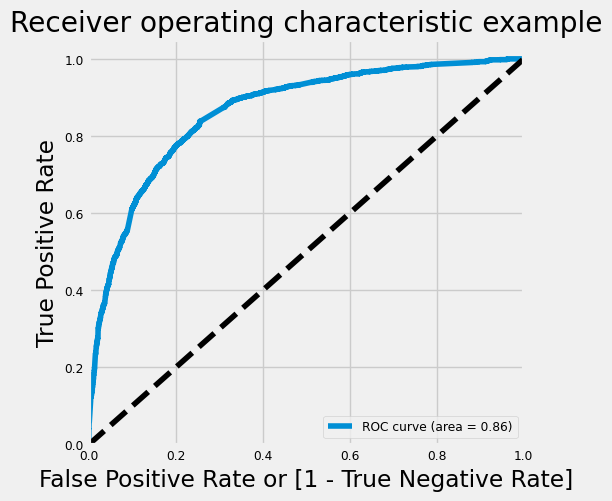

In [85]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Finding Optimal Cutoff Point

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.276636,1871,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.254710,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.368635,3516,0,1,1,1,1,0,0,0,0,0,0
8105,0,0.853630,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.153887,3934,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.569109  0.970397  0.321839
0.2   0.2  0.729437  0.908354  0.619190
0.3   0.3  0.778448  0.821573  0.751874
0.4   0.4  0.790198  0.746553  0.817091
0.5   0.5  0.793135  0.665045  0.872064
0.6   0.6  0.774892  0.543796  0.917291
0.7   0.7  0.760977  0.460665  0.946027
0.8   0.8  0.733302  0.352798  0.967766
0.9   0.9  0.680891  0.182076  0.988256


<Figure size 1800x800 with 0 Axes>

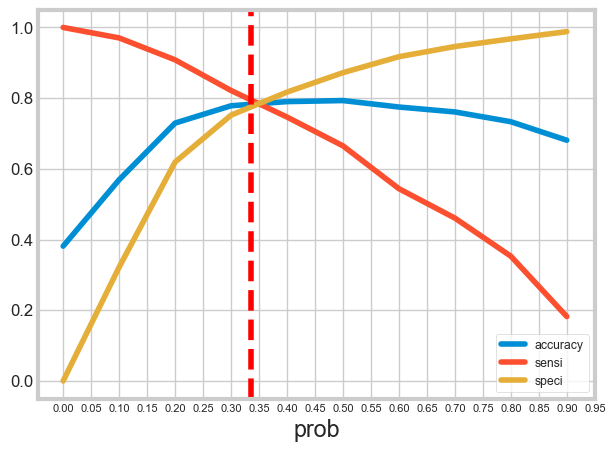

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [89]:
# Let us make the final prediction using 0.34 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.276636,1871,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.254710,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.368635,3516,0,1,1,1,1,0,0,0,0,0,0,1
8105,0,0.853630,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.153887,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [90]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
1871,0,0.276636,1871,0,1,1,1,0,0,0,0,0,0,0,0,28
6795,0,0.254710,6795,0,1,1,1,0,0,0,0,0,0,0,0,25
3516,0,0.368635,3516,0,1,1,1,1,0,0,0,0,0,0,1,37
8105,0,0.853630,8105,1,1,1,1,1,1,1,1,1,1,0,1,85
3934,0,0.153887,3934,0,1,1,0,0,0,0,0,0,0,0,0,15
4844,1,0.906366,4844,1,1,1,1,1,1,1,1,1,1,1,1,91
3297,0,0.146944,3297,0,1,1,0,0,0,0,0,0,0,0,0,15
8071,1,0.982388,8071,1,1,1,1,1,1,1,1,1,1,1,1,98
987,0,0.217382,987,0,1,1,1,0,0,0,0,0,0,0,0,22
7423,1,0.913030,7423,1,1,1,1,1,1,1,1,1,1,1,1,91


In [91]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1957
0     509
Name: final_predicted, dtype: int64

In [92]:
1957/float(1957+509)

0.7935928629359287

Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [93]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7840136054421769

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  888],
       [ 509, 1957]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7935928629359287

In [97]:
# Let us calculate specificity

TN / float(TN+FP)

0.7781109445277361

In [98]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.22188905547226387


In [99]:
# Positive predictive value 

print (TP / float(TP+FP))

0.6878734622144113


In [100]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8595086944521115


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Calculate the precision
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Calculate the recall
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Calculate the f1 score
f1 = f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7840136054421769
Precision: 0.6878734622144113
Recall: 0.7935928629359287
F1 Score: 0.7369610242892111


Metrics - Precision and Recall

In [102]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3490,  512],
       [ 826, 1640]], dtype=int64)

##### 4.4 Making predictions on the test set

In [103]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Selected,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,8.0,1011.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,5.0,59.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Selected,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0.470588,0.549274,0.888889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0.294118,0.032055,0.555556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [105]:
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [106]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[rfe_col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
4269,0.470588,0.549274,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0
7766,0.294118,0.032055,0,0,0,0,0,0,0,0,0,0,0,0,1
9199,0.000000,0.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
4359,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0


In [107]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [108]:
# Predicting the final test model 
y_test_pred = res.predict(X_test_sm)

In [109]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.809583
2376    0.964647
7766    0.404862
9199    0.068281
4359    0.881812
9186    0.636192
1631    0.507259
8963    0.174050
8007    0.104599
5324    0.382650
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.809583
2376,0.964647
7766,0.404862
9199,0.068281
4359,0.881812


In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [112]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.809583
1,1,2376,0.964647
2,1,7766,0.404862
3,0,9199,0.068281
4,1,4359,0.881812


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.809583
1,2376,1,0.964647
2,7766,1,0.404862
3,9199,0,0.068281
4,4359,1,0.881812


In [114]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.809583,1
1,2376,1,0.964647,1
2,7766,1,0.404862,1
3,9199,0,0.068281,0
4,4359,1,0.881812,1


In [115]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted_IND']==1,['Converted_IND','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    869
0    226
Name: final_predicted, dtype: int64

In [116]:
# check the precentage of final_predicted conversions on test data

869/float(869+226)

0.7936073059360731

Hence we can see that the final prediction of conversions have a target rate of 79.3%  (Around 0.7 % short of the predictions made on training data set)

##### 4.5 Model Evalution : Test Dataset

In [117]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.786075036075036

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion2

array([[1310,  367],
       [ 226,  869]], dtype=int64)

In [119]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7936073059360731

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.7811568276684556

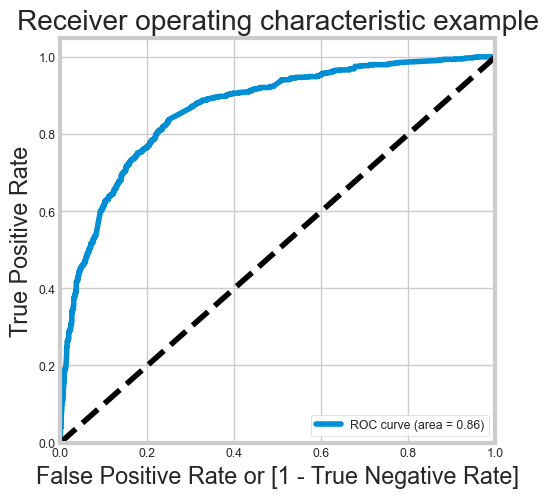

In [122]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

Inferences:
ROC value of 0.86 shows the model is performing well in Test dataset.

In [123]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1677
           1       0.70      0.79      0.75      1095

    accuracy                           0.79      2772
   macro avg       0.78      0.79      0.78      2772
weighted avg       0.79      0.79      0.79      2772



In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

# Calculate the precision
precision = precision_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

# Calculate the recall
recall = recall_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

# Calculate the f1 score
f1 = f1_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.786075036075036
Precision: 0.7030744336569579
Recall: 0.7936073059360731
F1 Score: 0.7456027456027455


In [125]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
603,6243,1,0.997904,1,99
772,2158,1,0.996094,1,99
224,8120,1,0.995403,1,99
2589,7327,1,0.995339,1,99
1091,818,1,0.995158,1,99
...,...,...,...,...,...
136,5643,0,0.011864,0,1
1508,5380,0,0.011835,0,1
2443,9173,0,0.011700,0,1
2146,5472,0,0.011372,0,1


### Conclusion

Inferences:
We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.

In [126]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = res.params[1:]
final_parameters

TotalVisits                                      0.71
Total Time Spent on Website                      3.71
Lead Source_Olark Chat                           1.26
Lead Source_Reference                            4.23
Lead Source_Welingak Website                     5.60
Last Activity_Email Bounced                     -1.62
Last Activity_Had a Phone Conversation           1.94
Last Activity_Olark Chat Conversation           -0.91
Last Activity_SMS Sent                           0.69
Last Notable Activity_Email Link Clicked        -1.15
Last Notable Activity_Email Opened              -0.61
Last Notable Activity_Modified                  -1.35
Last Notable Activity_Olark Chat Conversation   -1.16
Last Notable Activity_Page Visited on Website   -1.13
Last Notable Activity_Unreachable                0.90
dtype: float64

In [130]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors =  10*(top_predictors / top_predictors.max())
top_predictors

TotalVisits                                      1.27
Total Time Spent on Website                      6.63
Lead Source_Olark Chat                           2.26
Lead Source_Reference                            7.57
Lead Source_Welingak Website                    10.00
Last Activity_Email Bounced                     -2.89
Last Activity_Had a Phone Conversation           3.47
Last Activity_Olark Chat Conversation           -1.62
Last Activity_SMS Sent                           1.23
Last Notable Activity_Email Link Clicked        -2.06
Last Notable Activity_Email Opened              -1.08
Last Notable Activity_Modified                  -2.41
Last Notable Activity_Olark Chat Conversation   -2.07
Last Notable Activity_Page Visited on Website   -2.01
Last Notable Activity_Unreachable                1.61
dtype: float64

<Figure size 1200x800 with 0 Axes>

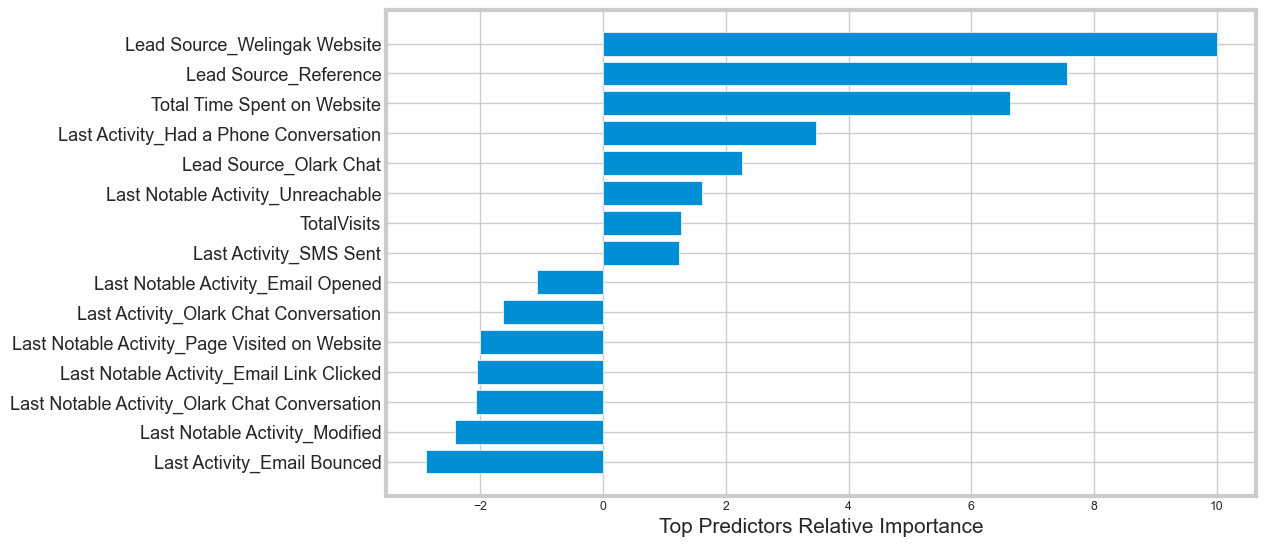

In [131]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()